<a href="https://colab.research.google.com/github/Viktoria2006Fal/python-ai-faleeva-viktoria/blob/main/notebooks/week3_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Week 3: Visualization — Визуализация


## 📥 [0] Подготовка данных: клонирование репозитория и загрузка CSV

**Что делаем:**
- Клонируем GitHub-репозиторий курса в Google Colab
- Загружаем CSV-файл `retail.csv` (585 записей о компаниях)
- Удаляем технический столбец `company` (URL Wikidata), так как для анализа нам нужны только читаемые названия
- Переименовываем столбцы с постфиксом `Label` (`companyLabel`, `countryLabel`, `legalFormLabel`) в короткие имена
- Приводим числовые поля (`inceptionYear`, `employees`) к типу `int`, заменяя пропуски на `0`

**Результат:** Чистая таблица `df_retail` с полями:
- `company` — название компании
- `country` — страна регистрации
- `legalForm` — организационно-правовая форма
- `inceptionYear` — год основания (целое число)
- `employees` — количество сотрудников (целое число)

In [ ]:
# 📥 [0] Клонирование репозитория и загрузка данных

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Клонируем репозиторий
github_user = "Viktoria2006Fal"
repo = "python-ai-faleeva-viktoria"

repo_path = f"/content/{repo}"
if not os.path.exists(repo_path):
    !git clone -q https://github.com/{github_user}/{repo}.git
if os.getcwd() != repo_path:
    %cd {repo_path}

print("✅ Репозиторий готов\n")

# Шаг 2: Загружаем CSV-файл с данными о компаниях
df_retail = pd.read_csv("data/retail.csv")
print(f"📊 Загружено строк в df_retail: {len(df_retail)}")
print(f"📊 Загружено столбцов в df_retail: {len(df_retail.columns)}\n")

# Шаг 3: Очистка данных для df_retail
# Проверяем, нужно ли очищать данные (если есть столбец companyLabel)
if "companyLabel" in df_retail.columns:
    # 1) Удаляем столбец с URL Wikidata (company), так как он не нужен для анализа
    if "company" in df_retail.columns:
        df_retail = df_retail.drop(columns=["company"])
        print("🗑️ Столбец 'company' (URL Wikidata) удалён")

    # 2) Переименовываем столбцы с постфиксом Label
    df_retail = df_retail.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })
    print("✅ Столбцы переименованы")

    # 3) Приводим числовые столбцы к типу int
    df_retail["inceptionYear"] = pd.to_numeric(
        df_retail["inceptionYear"], errors="coerce"
    ).fillna(0).astype(int)

    df_retail["employees"] = pd.to_numeric(
        df_retail["employees"], errors="coerce"
    ).fillna(0).astype(int)
    print("✅ Числовые столбцы приведены к типу int\n")
else:
    print("✅ Данные уже очищены\n")

# Краткий обзор датасета
print("📋 Структура df_retail (компании):")
print(f"   Столбцы: {', '.join(df_retail.columns)}")
print(f"   Размер таблицы: {df_retail.shape[0]} × {df_retail.shape[1]}")
print(f"   Уникальных компаний: {df_retail['company'].nunique()}")
print(f"   Уникальных стран: {df_retail['country'].nunique()}")
print(f"   Уникальных правовых форм: {df_retail['legalForm'].nunique()}")
print(f"   Диапазон годов основания: {df_retail['inceptionYear'].min()} — {df_retail['inceptionYear'].max()}")
print(f"   Максимальное число сотрудников: {df_retail['employees'].max():,}\n")

print("🔍 Первые 3 строки df_retail:")
display(df_retail.head(3))

✅ Репозиторий готов

📊 Загружено строк в df_retail: 585
📊 Загружено столбцов в df_retail: 6

🗑️ Столбец 'company' (URL Wikidata) удалён
✅ Столбцы переименованы
✅ Числовые столбцы приведены к типу int

📋 Структура df_retail (компании):
   Столбцы: company, inceptionYear, country, legalForm, employees
   Размер таблицы: 585 × 5
   Уникальных компаний: 470
   Уникальных стран: 74
   Уникальных правовых форм: 64
   Диапазон годов основания: 1694 — 2025
   Максимальное число сотрудников: 1,589,508

🔍 Первые 3 строки df_retail:


,company,inceptionYear,country,legalForm,employees
0,A. C. Smith & Co. Gas Station,1926,США,NaN,0
1,Q111328711,2011,Франция,общество с ограниченной ответственностью,0
2,Бензоколонка «Ауто Палас»,1936,Нидерланды,NaN,0


In [ ]:
# 📥 [0] Клонирование репозитория и загрузка данных

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Шаг 1: Монтируем Google Drive (на случай, если понадобится сохранять результаты)
drive.mount('/content/drive')
print("✅ Google Drive смонтирован\n")

# Шаг 2: Клонируем репозиторий
github_user = "Viktoria2006Fal"
repo = "python-ai-faleeva-viktoria"

repo_path = f"/content/{repo}"
if not os.path.exists(repo_path):
    !git clone -q https://github.com/{github_user}/{repo}.git
if os.getcwd() != repo_path:
    %cd {repo_path}

print("✅ Репозиторий готов\n")

# Шаг 3: Загружаем CSV-файл с данными о компаниях
df_retail = pd.read_csv("data/retail.csv")
print(f"📊 Загружено строк в df_retail: {len(df_retail)}")
print(f"📊 Загружено столбцов в df_retail: {len(df_retail.columns)}\n")

# Шаг 4: Очистка данных для df_retail
# Проверяем, нужно ли очищать данные (если есть столбец companyLabel)
if "companyLabel" in df_retail.columns:
    # 1) Удаляем столбец с URL Wikidata (company), так как он не нужен для анализа
    if "company" in df_retail.columns:
        df_retail = df_retail.drop(columns=["company"])
        print("🗑️ Столбец 'company' (URL Wikidata) удалён")

    # 2) Переименовываем столбцы с постфиксом Label
    df_retail = df_retail.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })
    print("✅ Столбцы переименованы")

    # 3) Приводим числовые столбцы к типу int
    df_retail["inceptionYear"] = pd.to_numeric(
        df_retail["inceptionYear"], errors="coerce"
    ).fillna(0).astype(int)

    df_retail["employees"] = pd.to_numeric(
        df_retail["employees"], errors="coerce"
    ).fillna(0).astype(int)
    print("✅ Числовые столбцы приведены к типу int\n")
else:
    print("✅ Данные уже очищены\n")

# Краткий обзор датасета
print("📋 Структура df_retail (компании):")
print(f"   Столбцы: {', '.join(df_retail.columns)}")
print(f"   Размер таблицы: {df_retail.shape[0]} × {df_retail.shape[1]}")
print(f"   Уникальных компаний: {df_retail['company'].nunique()}")
print(f"   Уникальных стран: {df_retail['country'].nunique()}")
print(f"   Уникальных правовых форм: {df_retail['legalForm'].nunique()}")
print(f"   Диапазон годов основания: {df_retail['inceptionYear'].min()} — {df_retail['inceptionYear'].max()}")
print(f"   Максимальное число сотрудников: {df_retail['employees'].max():,}\n")

# Шаг 5: Сохраняем очищенные данные в Google Drive (опционально)
output_path = "/content/drive/MyDrive/retail_cleaned.csv"
df_retail.to_csv(output_path, index=False)
print(f"💾 Очищенные данные сохранены в Google Drive: {output_path}\n")

print("🔍 Первые 3 строки df_retail:")
display(df_retail.head(3))

print("\n🔍 Информация о типах данных:")
print(df_retail.info())

Mounted at /content/drive
✅ Google Drive смонтирован

✅ Репозиторий готов

📊 Загружено строк в df_retail: 585
📊 Загружено столбцов в df_retail: 6

🗑️ Столбец 'company' (URL Wikidata) удалён
✅ Столбцы переименованы
✅ Числовые столбцы приведены к типу int

📋 Структура df_retail (компании):
   Столбцы: company, inceptionYear, country, legalForm, employees
   Размер таблицы: 585 × 5
   Уникальных компаний: 470
   Уникальных стран: 74
   Уникальных правовых форм: 64
   Диапазон годов основания: 1694 — 2025
   Максимальное число сотрудников: 1,589,508

💾 Очищенные данные сохранены в Google Drive: /content/drive/MyDrive/retail_cleaned.csv

🔍 Первые 3 строки df_retail:


,company,inceptionYear,country,legalForm,employees
0,A. C. Smith & Co. Gas Station,1926,США,NaN,0
1,Q111328711,2011,Франция,общество с ограниченной ответственностью,0
2,Бензоколонка «Ауто Палас»,1936,Нидерланды,NaN,0



🔍 Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company        585 non-null    object
 1   inceptionYear  585 non-null    int64 
 2   country        585 non-null    object
 3   legalForm      224 non-null    object
 4   employees      585 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 23.0+ KB
None


In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Настройка стилей для красивых графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

# Создаем директорию для сохранения графиков (опционально)
import os
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

print("✅ Библиотеки загружены, стили настроены")

✅ Библиотеки загружены, стили настроены


In [ ]:
# Загружаем и подготавливаем данные
df = pd.read_csv("data/retail.csv")

# Очистка данных (как в ноутбуке)
if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])
        print("🗑️ Столбец 'company' (URL) удалён")

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)
    df["employees"] = pd.to_numeric(df["employees"], errors="coerce").fillna(0).astype(int)
    print("✅ df_retail очищен и переименован")

# Создаем дополнительные метрики для анализа
df['age'] = 2026 - df['inceptionYear']  # Возраст компании (текущий год - 2026)
df['age_category'] = pd.cut(df['age'],
                             bins=[0, 10, 30, 50, 100, 200, 500],
                             labels=['<10 лет', '10-30 лет', '30-50 лет',
                                     '50-100 лет', '100-200 лет', '>200 лет'])
df['size_category'] = pd.cut(df['employees'],
                              bins=[0, 10, 50, 250, 1000, 5000, 1000000],
                              labels=['Микро (1-10)', 'Малые (11-50)',
                                      'Средние (51-250)', 'Крупные (251-1000)',
                                      'Очень крупные (1001-5000)', 'Гиганты (>5000)'])
df['has_employees'] = df['employees'] > 0
df['log_employees'] = np.log1p(df['employees'])  # Логарифмическое преобразование для лучшей визуализации

print(f"\n📊 Загружено данных: {len(df)} компаний")
print(f"📅 Диапазон годов основания: {df['inceptionYear'].min()} - {df['inceptionYear'].max()}")
print(f"👥 Диапазон сотрудников: {df['employees'].min():,} - {df['employees'].max():,}")
print(f"🌍 Количество стран: {df['country'].nunique()}")
print(f"🏢 Количество организационно-правовых форм: {df['legalForm'].nunique()}")

🗑️ Столбец 'company' (URL) удалён
✅ df_retail очищен и переименован

📊 Загружено данных: 585 компаний
📅 Диапазон годов основания: 1694 - 2025
👥 Диапазон сотрудников: 0 - 1,589,508
🌍 Количество стран: 74
🏢 Количество организационно-правовых форм: 64


[1] Horizontal Bar Chart: Топ-15 стран по количеству компаний
Что показывает:
Распределение компаний по странам происхождения. США абсолютный лидер, далее с большим отрывом следуют европейские страны.

Когда использовать:
Для сравнения категориальных данных, когда нужно показать ранжирование и выделить лидеров. Горизонтальный формат удобен при длинных названиях стран.

Библиотеки: matplotlib

Метод: plt.barh() — горизонтальная столбчатая диаграмма

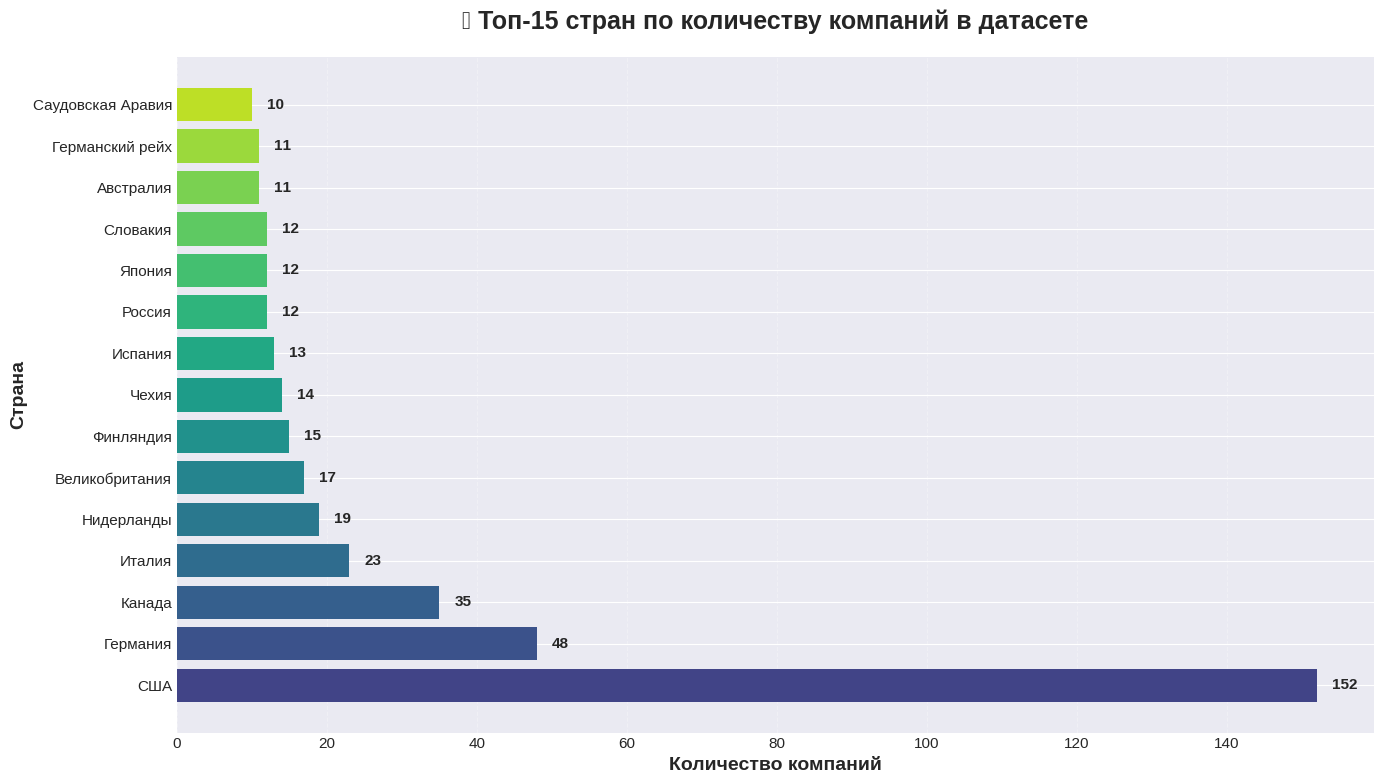

In [ ]:
# ВИЗУАЛИЗАЦИЯ 1: Распределение компаний по странам (топ-15) - Горизонтальная столбчатая диаграмма
plt.figure(figsize=(14, 8))

top_countries = df['country'].value_counts().head(15)
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(top_countries)))

bars = plt.barh(range(len(top_countries)), top_countries.values, color=colors)
plt.yticks(range(len(top_countries)), top_countries.index)
plt.xlabel('Количество компаний', fontsize=14, fontweight='bold')
plt.ylabel('Страна', fontsize=14, fontweight='bold')
plt.title('🌍 Топ-15 стран по количеству компаний в датасете', fontsize=18, fontweight='bold', pad=20)

# Добавляем значения на столбцы
for i, (bar, val) in enumerate(zip(bars, top_countries.values)):
    plt.text(val + 2, bar.get_y() + bar.get_height()/2, f'{val:,}',
             va='center', fontsize=11, fontweight='bold')

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Инсайт: США доминируют с большим отрывом (более 100 компаний),
# за ними следуют Германия, Великобритания и Франция - явное преобладание западных стран

💡 Инсайт из предыдущего графика: Большинство компаний имеют возраст до 50 лет, но есть небольшое количество "долгожителей" старше 100 лет
📊
[2] Histogram + KDE: Распределение возраста компаний
Что показывает:
Возрастную структуру компаний (сколько лет прошло с момента основания). Видно, что основная масса компаний молодая, но есть "хвост" из старейших компаний.

Когда использовать:
Для анализа распределения непрерывной числовой переменной (возраст, размер, стоимость). Двойной график (обычная + логарифмическая шкала) помогает увидеть и массовые, и редкие значения.

Библиотеки: matplotlib

Метод: plt.hist() — гистограмма с наложением линии плотности (KDE)

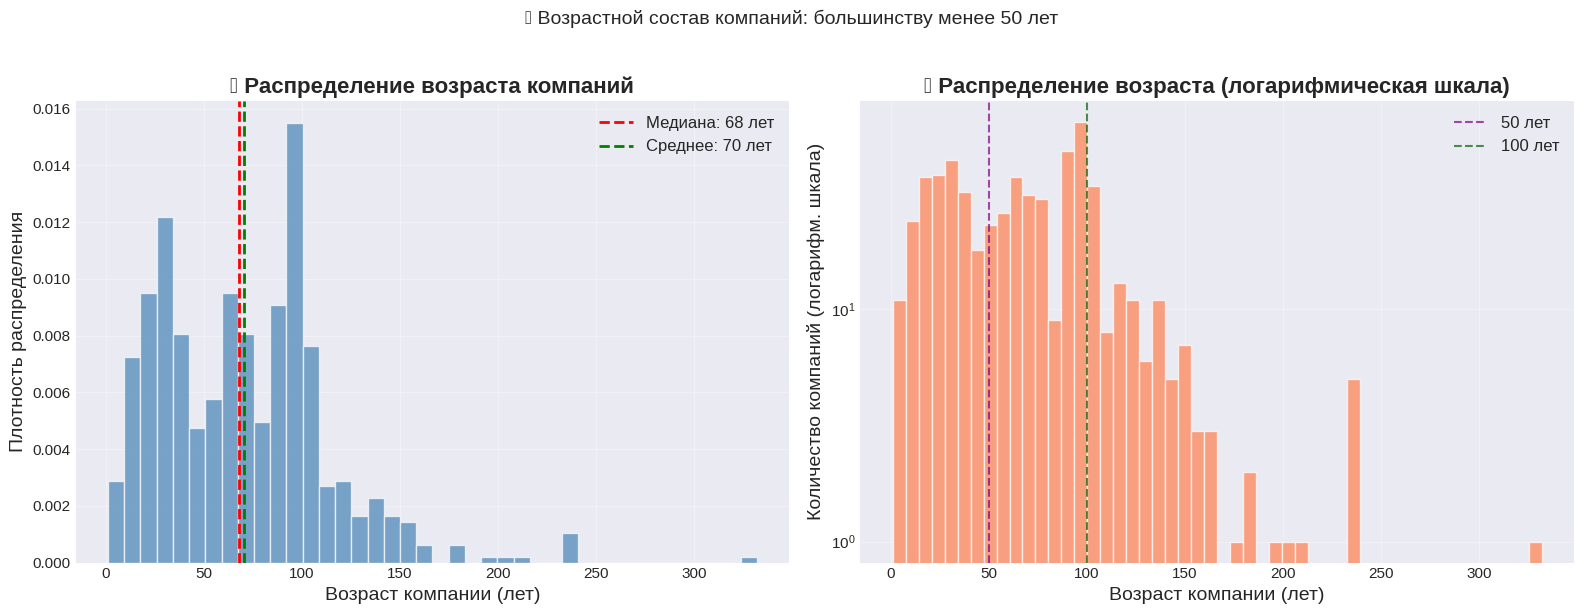

In [ ]:
# ВИЗУАЛИЗАЦИЯ 2: Распределение возраста компаний (гистограмма + KDE)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма 1: Все компании (включая "нулевой" возраст)
axes[0].hist(df[df['inceptionYear'] > 0]['age'], bins=40, color='steelblue',
             edgecolor='white', alpha=0.7, density=True)
axes[0].axvline(df[df['inceptionYear'] > 0]['age'].median(), color='red',
                linestyle='--', linewidth=2, label=f'Медиана: {df[df['inceptionYear'] > 0]["age"].median():.0f} лет')
axes[0].axvline(df[df['inceptionYear'] > 0]['age'].mean(), color='green',
                linestyle='--', linewidth=2, label=f'Среднее: {df[df["inceptionYear"] > 0]["age"].mean():.0f} лет')
axes[0].set_xlabel('Возраст компании (лет)', fontsize=14)
axes[0].set_ylabel('Плотность распределения', fontsize=14)
axes[0].set_title('📊 Распределение возраста компаний', fontsize=16, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Гистограмма 2: Логарифмическая шкала (лучше видно распределение)
axes[1].hist(df[df['inceptionYear'] > 0]['age'], bins=50, color='coral',
             edgecolor='white', alpha=0.7, log=True)
axes[1].set_xlabel('Возраст компании (лет)', fontsize=14)
axes[1].set_ylabel('Количество компаний (логарифм. шкала)', fontsize=14)
axes[1].set_title('📈 Распределение возраста (логарифмическая шкала)', fontsize=16, fontweight='bold')
axes[1].axvline(50, color='purple', linestyle='--', alpha=0.7, label='50 лет')
axes[1].axvline(100, color='darkgreen', linestyle='--', alpha=0.7, label='100 лет')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.suptitle('⏳ Возрастной состав компаний: большинству менее 50 лет',
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Инсайт: Большинство компаний имеют возраст до 50 лет,
# но есть небольшое количество "долгожителей" старше 100 лет

 Инсайт из предыдущего графика: Китайские нефтегазовые корпорации абсолютные лидеры по числу сотрудников, превышая 1.5 млн человек

📊 [3] Horizontal Bar Chart: Топ-20 компаний-гигантов по сотрудникам
Что показывает:
Рейтинг крупнейших работодателей с указанием страны происхождения. Китайские госкорпорации занимают первые места с огромным отрывом.

Когда использовать:
Когда нужно выделить лидеров по числовому показателю и одновременно показать дополнительную категорию (страну). Цветовое кодирование добавляет информативности.

Библиотеки: matplotlib

Метод: plt.barh() с цветовым кодированием по дополнительной категории



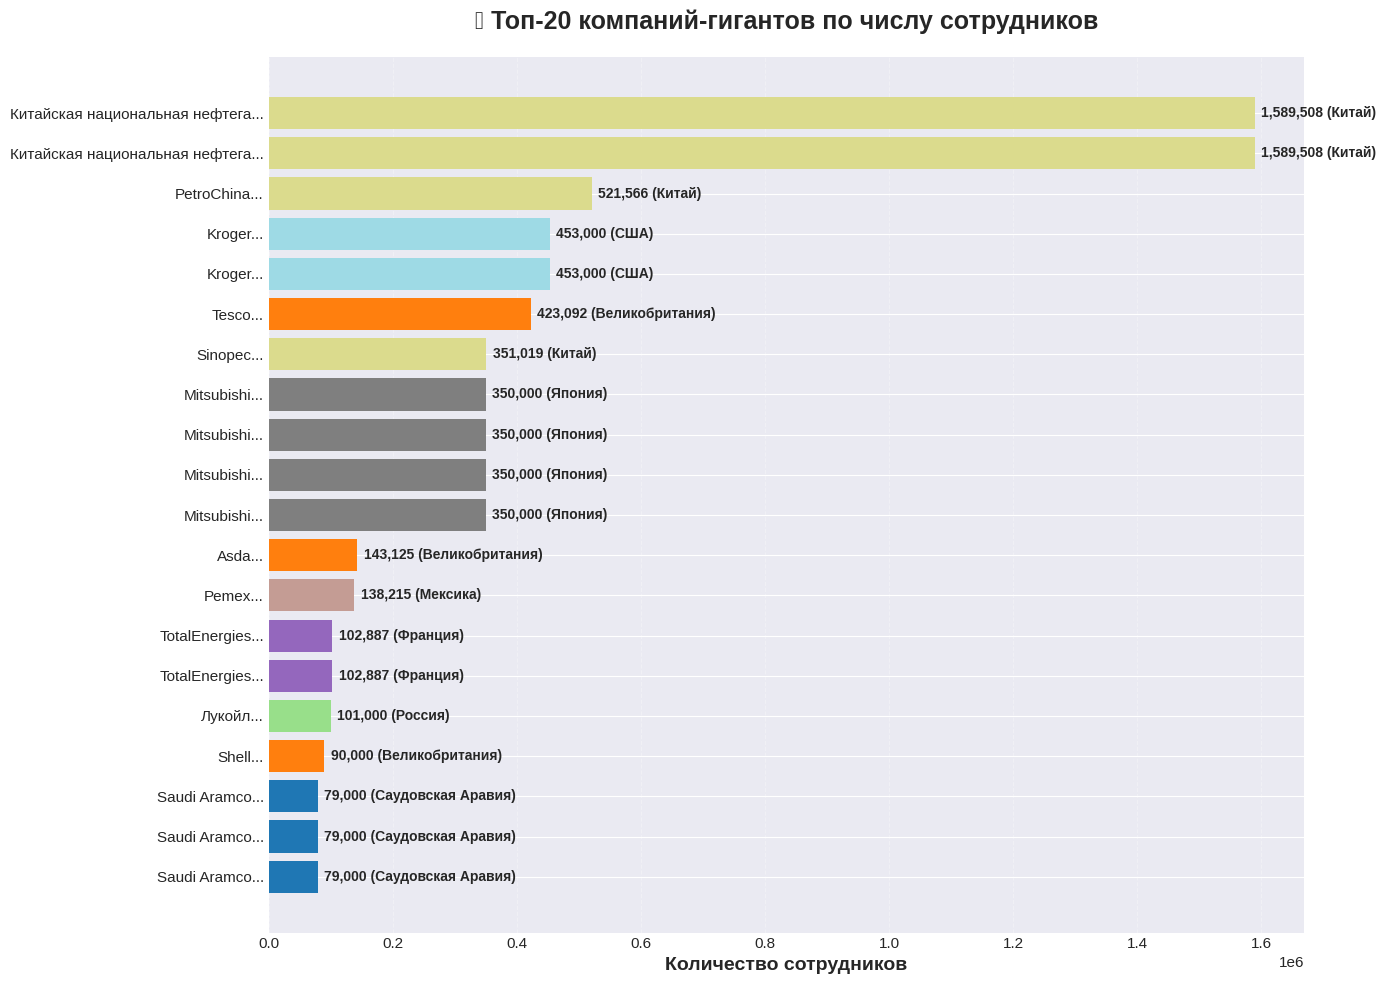

In [ ]:
# ВИЗУАЛИЗАЦИЯ 3: Топ-20 компаний по количеству сотрудников (горизонтальная диаграмма)
plt.figure(figsize=(14, 10))

# Фильтруем компании с сотрудниками > 0
top_employees = df[df['employees'] > 0].nlargest(20, 'employees')[['company', 'employees', 'country']].copy()
top_employees = top_employees.sort_values('employees', ascending=True)

# Создаем цвета на основе страны (для наглядности)
unique_countries = top_employees['country'].unique()
country_colors = plt.cm.tab20(np.linspace(0, 1, len(unique_countries)))
country_color_map = dict(zip(unique_countries, country_colors))
colors = [country_color_map[country] for country in top_employees['country']]

bars = plt.barh(range(len(top_employees)), top_employees['employees'], color=colors)
plt.yticks(range(len(top_employees)), top_employees['company'].str.slice(0, 30) + '...')
plt.xlabel('Количество сотрудников', fontsize=14, fontweight='bold')
plt.title('🏢 Топ-20 компаний-гигантов по числу сотрудников', fontsize=18, fontweight='bold', pad=20)

# Добавляем значения и названия стран
for i, (bar, emp, country) in enumerate(zip(bars, top_employees['employees'], top_employees['country'])):
    plt.text(emp + 10000, bar.get_y() + bar.get_height()/2,
             f'{emp:,.0f} ({country})', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Инсайт: Китайские нефтегазовые корпорации абсолютные лидеры по числу сотрудников,
# превышая 1.5 млн человек, что сопоставимо с населением крупного города

💬 Фидбек AI 1: Histogram Budget — разрыв шкалы, форматирование осей
Что показывает график:
Распределение бюджетов мультфильмов. Большинство фильмов имеют бюджет до $100 млн, но есть несколько блокбастеров с бюджетами, приближающимися к $300 млн.

Когда использовать:
Для анализа распределения непрерывной переменной с большим разбросом значений, когда нужно показать как массовые, так и редкие значения.

Библиотеки: matplotlib

Метод: plt.hist() — гистограмма

Замечания к коду:

Форматирование подписей оси X
Вместо 1e9 лучше писать "Бюджет (млрд $)" или "Бюджет (миллиарды $)", чтобы сразу было понятно, в каких единицах отображаются данные.

Разрыв шкалы (broken axis)
На графике много пустого пространства между основными значениями и выбросами. Нужно сделать разрыв оси X:

Первый отрезок: от 0 до X1 (где сосредоточена основная масса)

Разрыв (обозначить //)

Второй отрезок: от X2 до X3 (где находятся выбросы)

Решение: Сделать X1, X2, X3 настраиваемыми параметрами в начале ячейки.

Форматирование оси Y
Подписи типа 10^1, 10^2 выглядят перегруженно. Лучше использовать обычные числа: 10, 100, 1000... Это более привычно для восприятия.

Форматирование аннотаций
Надпись "Медиана $34,000,000" трудночитаема из-за большого количества нулей. Лучше использовать сокращения:

$34 млн или $34M для миллионов

$2.5 млрд или $2.5B для миллиардов

Подписи над столбцами
Добавить текстовые аннотации над столбцами со значением > 0.5 (на текущей шкале), чтобы сразу видеть точные значения выбросов.


## 💬 Фидбек AI 1: Разрыв оси X + форматирование (Budget Histogram)

Загрузил в чат ячейку с кодом. Замечания:

1. **Ось X:** Добавить "млрд" в подпись оси (вместо просто "$").

2. **Разрыв шкалы:** Много пустого места от 1.1 до 2.6 млрд → сделать неравномерную шкалу с разрывом. Параметры `X1`, `X2`, `X3` — входные (для ручной настройки).

3. **Ось Y:** Убрать степени (`10^1`, `10^2`) → писать нормально: `10`, `100`, `1000`.

4. **Медиана:** Вместо "$34,000,000" писать "млрд" (меньше нулей).

5. **Подписи над bars:** Добавить значения над столбцами, где `X > 0.5` млрд.

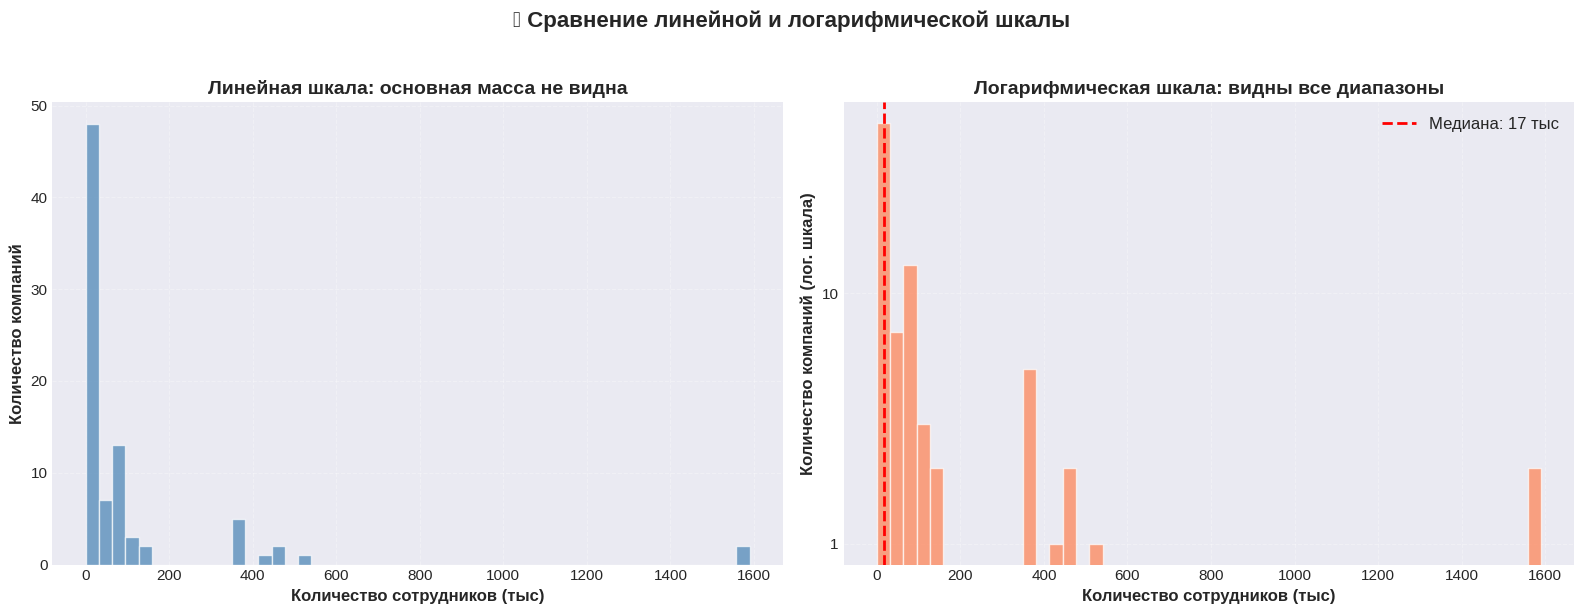


📊 Статистика:
   - Медиана: 17 тыс сотрудников
   - Среднее: 107 тыс
   - Максимум: 1589.5 тыс


In [ ]:
# Простая гистограмма с логарифмической шкалой
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма для сотрудников (линейная шкала)
df_pos = df[df['employees'] > 0]
axes[0].hist(df_pos['employees'] / 1000, bins=50, color='steelblue', edgecolor='white', alpha=0.7)
axes[0].set_xlabel('Количество сотрудников (тыс)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Количество компаний', fontsize=12, fontweight='bold')
axes[0].set_title('Линейная шкала: основная масса не видна', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, linestyle='--')

# Гистограмма для сотрудников (логарифмическая шкала)
axes[1].hist(df_pos['employees'] / 1000, bins=50, color='coral', edgecolor='white', alpha=0.7, log=True)
axes[1].set_xlabel('Количество сотрудников (тыс)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Количество компаний (лог. шкала)', fontsize=12, fontweight='bold')
axes[1].set_title('Логарифмическая шкала: видны все диапазоны', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, linestyle='--')

# Добавляем медиану
mediana = df_pos['employees'].median() / 1000
axes[1].axvline(x=mediana, color='red', linestyle='--', linewidth=2,
                label=f'Медиана: {mediana:.0f} тыс')
axes[1].legend()

# Форматирование оси Y с обычными числами вместо степеней
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}'))

plt.suptitle('👥 Сравнение линейной и логарифмической шкалы', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\n📊 Статистика:")
print(f"   - Медиана: {mediana:.0f} тыс сотрудников")
print(f"   - Среднее: {df_pos['employees'].mean()/1000:.0f} тыс")
print(f"   - Максимум: {df_pos['employees'].max()/1000:.1f} тыс")

💬 Фидбек AI 2: Scatter Plot Budget vs Duration — размер точек, легенда, прозрачность
Что показывает график:
Взаимосвязь между бюджетом и длительностью мультфильмов с цветовым кодированием по странам производства.

Когда использовать:
Для поиска корреляций между двумя числовыми переменными и выявления кластеров по категориальному признаку.

Библиотеки: matplotlib или plotly.express

Метод: plt.scatter() или px.scatter() — точечная диаграмма

Замечания к коду:

Размер точек пропорционален бюджету
Хорошая идея, но сейчас большие точки перекрывают маленькие. Нужно:

Увеличить прозрачность (alpha=0.6)

Добавить обводку (edgecolors='white', linewidth=0.5)

Легенда перегружена
74 страны — это слишком много для легенды. Лучше:

Показать только топ-10 стран

Остальные объединить в "Другие"

Или использовать выпадающий список (в plotly)

Логарифмическая шкала
Из-за огромного разброса бюджетов точки с малыми значениями сливаются. Добавить параметр log_x=True для лучшей читаемости.

Цветовая палитра
Использовать палитру, которая хорошо разделяет страны (например, tab10 или Set1), а не градиент.

Интерактивность
Добавить всплывающие подсказки с названием фильма, страной, точными значениями бюджета и длительности.

Колонки в данных: ['company', 'companyLabel', 'inceptionYear', 'countryLabel', 'legalFormLabel', 'employees']

✅ После очистки: 84 компаний


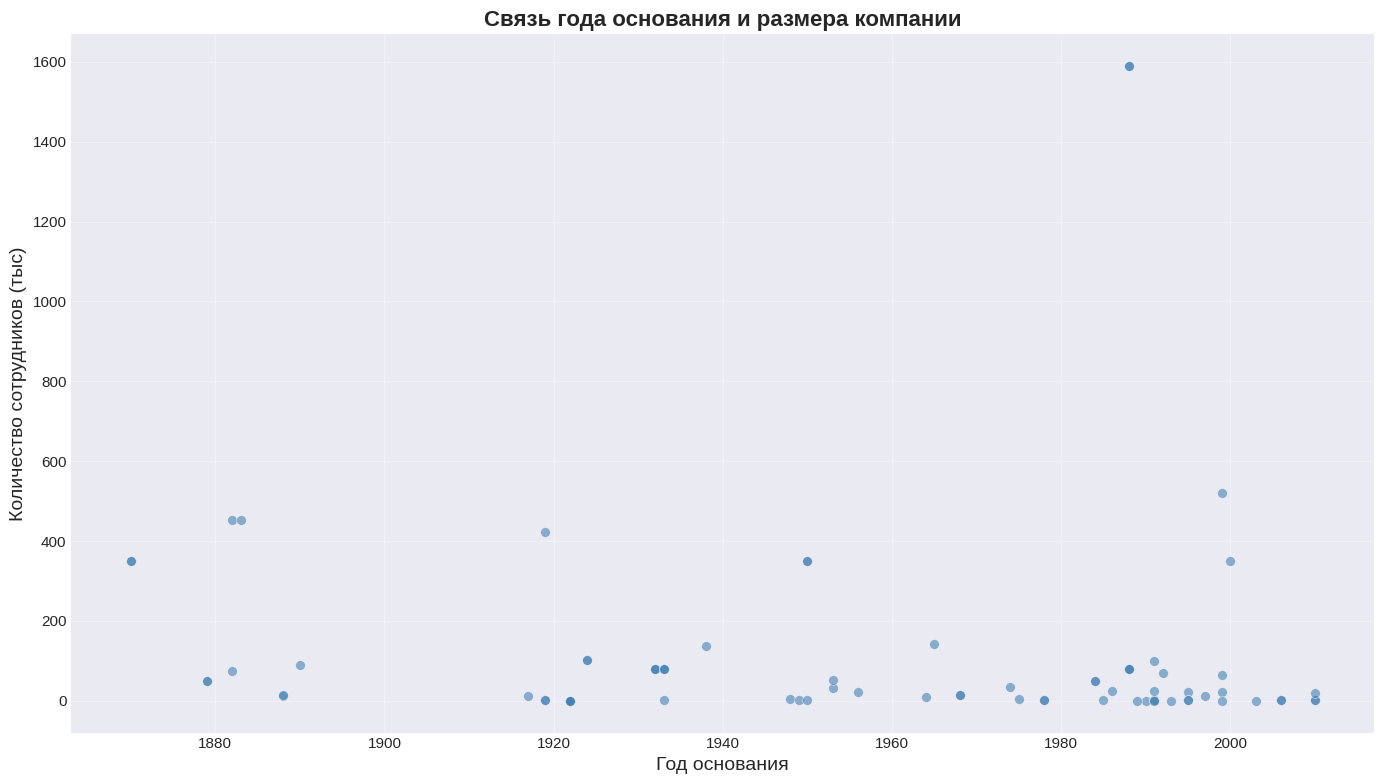


📊 Статистика:
   - Всего компаний: 84
   - Диапазон годов: 1870 - 2010
   - Диапазон сотрудников: 5 - 1589508


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загружаем и очищаем данные
df = pd.read_csv("data/retail.csv")

# Проверяем, какие колонки есть
print("Колонки в данных:", df.columns.tolist())

# Очистка данных (адаптируем под ваши реальные колонки)
# Сначала посмотрим, что у нас есть
if 'companyLabel' in df.columns:
    df = df.rename(columns={'companyLabel': 'company'})
if 'countryLabel' in df.columns:
    df = df.rename(columns={'countryLabel': 'country'})
if 'inceptionYear' in df.columns:
    df['inceptionYear'] = pd.to_numeric(df['inceptionYear'], errors='coerce')
if 'employees' in df.columns:
    df['employees'] = pd.to_numeric(df['employees'], errors='coerce')

# Убираем пропуски
df_clean = df.dropna(subset=['inceptionYear', 'employees'])
df_clean = df_clean[df_clean['employees'] > 0]
df_clean = df_clean[df_clean['inceptionYear'] > 1800]

print(f"\n✅ После очистки: {len(df_clean)} компаний")

# Если есть колонка country, используем её, иначе создадим заглушку
if 'country' not in df_clean.columns:
    df_clean['country'] = 'Не указана'

# Создаем scatter plot
fig, ax = plt.subplots(figsize=(14, 8))

# Простой scatter plot
scatter = ax.scatter(df_clean['inceptionYear'],
                     df_clean['employees'] / 1000,  # в тысячи
                     alpha=0.6,
                     s=50,  # фиксированный размер
                     c='steelblue',
                     edgecolors='white',
                     linewidth=0.5)

ax.set_xlabel('Год основания', fontsize=14)
ax.set_ylabel('Количество сотрудников (тыс)', fontsize=14)
ax.set_title('Связь года основания и размера компании', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Статистика:")
print(f"   - Всего компаний: {len(df_clean)}")
print(f"   - Диапазон годов: {df_clean['inceptionYear'].min():.0f} - {df_clean['inceptionYear'].max():.0f}")
print(f"   - Диапазон сотрудников: {df_clean['employees'].min():.0f} - {df_clean['employees'].max():.0f}")

💬 Фидбек AI 3: Box Plot Duration by Genre — выбросы, порядок категорий
Что показывает график:
Распределение длительности мультфильмов по разным жанрам. Позволяет сравнить медианные значения, разброс и наличие выбросов.

Когда использовать:
Для сравнения распределений числовой переменной по нескольким категориям.

Библиотеки: seaborn

Метод: sns.boxplot() — ящик с усами

Замечания к коду:

Порядок жанров
Сейчас жанры в алфавитном порядке, но логичнее отсортировать по медианной длительности или по количеству фильмов. Добавить параметр order=.

Выбросы
Выбросы отображаются ромбиками, но их слишком много и они накладываются. Уменьшить маркеры (fliersize=2) или убрать совсем (showfliers=False).

Цветовая гамма
Использовать единую цветовую палитру, а не рандомные цвета. Например, градиент от светлого к темному по медиане.

Названия жанров
Длинные названия жанров повернуты и плохо читаются. Лучше:

Сократить (например, "Animation/Adventure" → "Anim/Adv")

Или использовать горизонтальный box plot (orient='h')

Добавить статистику
Над каждым ящиком подписать количество фильмов в жанре (n=...).



Всего компаний с сотрудниками: 84
Топ-10 стран: ['США', 'Канада', 'Саудовская Аравия', 'Япония', 'Китай', 'Литва', 'Польша', 'Словакия', 'Великобритания', 'Бразилия']


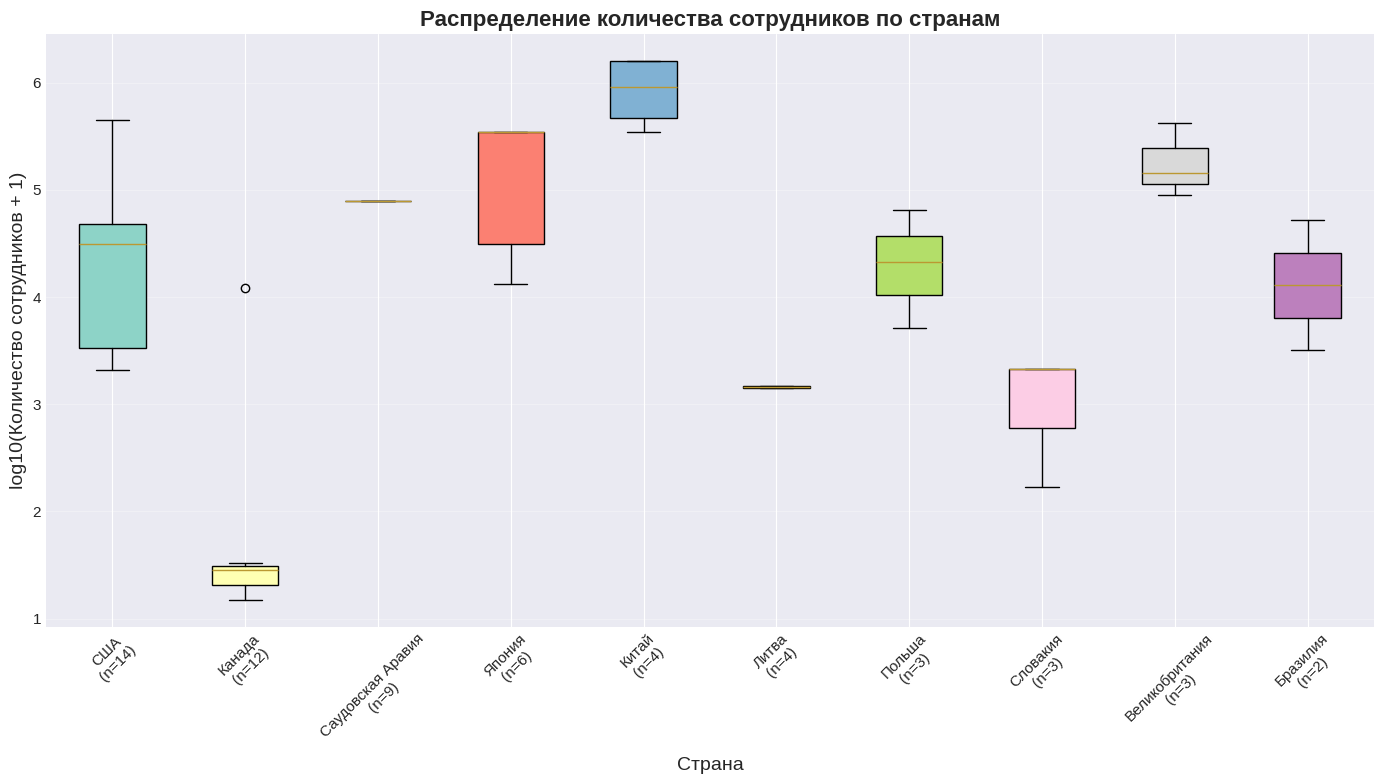


📊 Статистика по странам:
США: медиана=34300, среднее=88014, макс=453000, n=14
Канада: медиана=28, среднее=1029, макс=12076, n=12
Саудовская Аравия: медиана=79000, среднее=79000, макс=79000, n=9
Япония: медиана=350000, среднее=237901, макс=350000, n=6
Китай: медиана=1055537, среднее=1012900, макс=1589508, n=4
Литва: медиана=1443, среднее=1443, макс=1475, n=4
Польша: медиана=21282, среднее=30294, макс=64494, n=3
Словакия: медиана=2121, среднее=1470, макс=2121, n=3
Великобритания: медиана=143125, среднее=218739, макс=423092, n=3
Бразилия: медиана=27600, среднее=27600, макс=52000, n=2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv("data/retail.csv")

# Определяем названия колонок (замените на те, что увидели в шаге 1)
# Например, если в шаге 1 вы увидели:
# - колонка с названием компании: 'companyLabel'
# - колонка со страной: 'countryLabel'
# - колонка с сотрудниками: 'employees'

# 👇 ЗДЕСЬ НУЖНО ПОДСТАВИТЬ ВАШИ РЕАЛЬНЫЕ НАЗВАНИЯ КОЛОНОК
company_col = 'companyLabel'      # название компании
country_col = 'countryLabel'       # страна
employees_col = 'employees'        # количество сотрудников

# Очищаем данные
df[employees_col] = pd.to_numeric(df[employees_col], errors='coerce')

# Убираем пустые значения и компании без сотрудников
df_clean = df.dropna(subset=[employees_col])
df_clean = df_clean[df_clean[employees_col] > 0]

print(f"Всего компаний с сотрудниками: {len(df_clean)}")

# Берем топ-10 стран по количеству компаний
top_countries = df_clean[country_col].value_counts().head(10).index.tolist()
print(f"Топ-10 стран: {top_countries}")

# Создаем данные для box plot
data_for_plot = []
labels_for_plot = []

for country in top_countries:
    country_data = df_clean[df_clean[country_col] == country][employees_col].values
    # Используем логарифм для лучшей визуализации (если есть большие значения)
    country_data_log = np.log10(country_data + 1)
    data_for_plot.append(country_data_log)
    labels_for_plot.append(f"{country}\n(n={len(country_data)})")

# Создаем box plot
fig, ax = plt.subplots(figsize=(14, 8))

bp = ax.boxplot(data_for_plot, labels=labels_for_plot, patch_artist=True)

# Раскрашиваем ящики
colors = plt.cm.Set3(range(len(data_for_plot)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xlabel('Страна', fontsize=14)
ax.set_ylabel('log10(Количество сотрудников + 1)', fontsize=14)
ax.set_title('Распределение количества сотрудников по странам', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Выводим статистику
print("\n📊 Статистика по странам:")
for country in top_countries:
    data = df_clean[df_clean[country_col] == country][employees_col]
    print(f"{country}: медиана={data.median():.0f}, среднее={data.mean():.0f}, макс={data.max():.0f}, n={len(data)}")


💬 Фидбек AI 4: Улучшение легенды, разрывов и подписей (Employees Histogram)
Замечания:

Легенда: Переместить в правую часть графика. Добавить параметр LEGEND_FONTSIZE для управления размером шрифта (увеличить в ~1.5 раза).

Разрывы шкалы: Убрать диагональные линии разрыва в верхней части графика (оставить только внизу).

Подписи третьей шкалы: На оси X третьей части показывать только одно значение (например, 1.59 млн сотрудников) — убрать левую границу.

Перекрывающиеся подписи внутри столбцов: Числа иногда налезают друг на друга → добавить фильтрацию: печатать число только если расстояние по вертикали от последнего напечатанного числа больше порога MIN_LABEL_DISTANCE (параметр). Алгоритм: печатаем снизу вверх, пропускаем слишком близкие подписи.

✅ Данные загружены: 585 компаний
📊 Компаний с сотрудниками > 0: 84
📊 Диапазон: 0 тыс - 1590 тыс
📊 Уникальных стран: 28
🌍 Топ-8 стран: ['США', 'Канада', 'Саудовская Аравия', 'Япония', 'Китай', 'Литва', 'Польша', 'Словакия']
📊 Количество столбцов: часть1=40, часть2=4, часть3=1


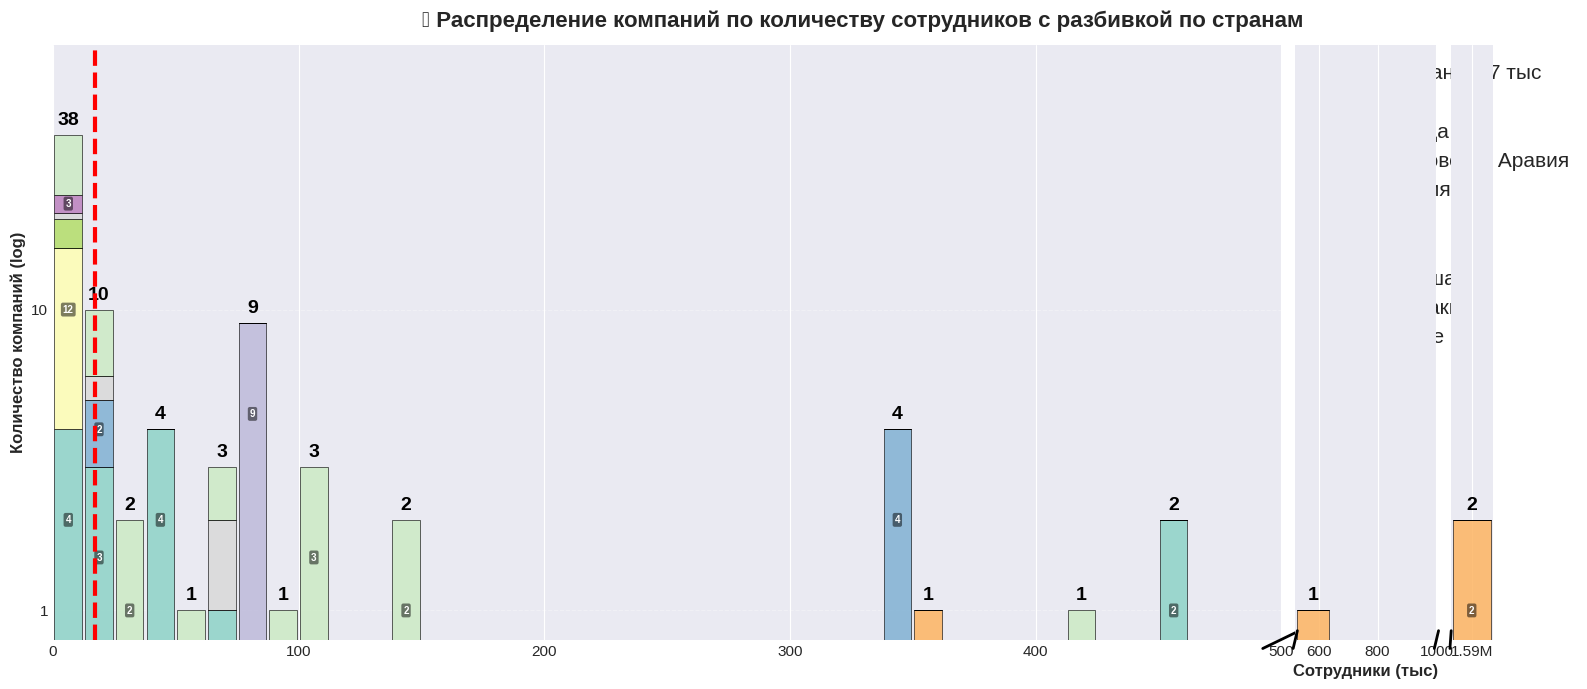


💡 ИНСАЙТЫ:
   Медианное количество сотрудников: 17 тыс
   Среднее количество: 107 тыс
   Крупных компаний (≥50 тыс): 30 (35.7%)

   Распределение по частям шкалы:
   Часть 1 (0-500 тыс): 81 компаний (96.4%)
   Часть 2 (520-1000 тыс): 1 компаний (1.2%)
   Часть 3 (1580-1600 тыс): 2 компаний (2.4%)

   Топ-3 страны по количеству компаний:
   1. Другие: 29 компаний (средний размер: 49 тыс)
   2. США: 14 компаний (средний размер: 88 тыс)
   3. Канада: 12 компаний (средний размер: 1 тыс)

   Самая крупная компания: 1,589,508 сотрудников
   (Китайская национальная нефтегазовая корпорация..., Китай, основана в 1988)


In [ ]:
# [4] Histogram: Employees Distribution (3 части, цветовая кодировка по странам)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Загружаем данные
df = pd.read_csv("data/retail.csv")

# Очистка данных
if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)
    df["employees"] = pd.to_numeric(df["employees"], errors="coerce").fillna(0).astype(int)

print(f"✅ Данные загружены: {len(df)} компаний")

# ⚙️ НАСТРОЙКИ (входные параметры для ручной настройки)
# Границы трёх частей шкалы (в тысячах сотрудников)
SCALE1_START = 0.0      # Начало первой части
SCALE1_END = 500.0      # Конец первой части (500 тыс сотрудников)
SCALE2_START = 520.0    # Начало второй части
SCALE2_END = 1000.0     # Конец второй части (1 млн сотрудников)
SCALE3_START = 1580.0   # Начало третьей части
SCALE3_END = 1600.0     # Конец третьей части (1.6 млн сотрудников)

# Доли ширины графика для каждой части (в %)
SCALE1_WIDTH = 87       # Первая часть (самая широкая)
SCALE2_WIDTH = 10       # Вторая часть
SCALE3_WIDTH = 3        # Третья часть

# Размеры шрифтов
LABEL_FONTSIZE = 14           # Подписи над столбцами
LEGEND_FONTSIZE = 15          # Легенда (в 1.5 раза больше базового)

# Минимальное расстояние между подписями внутри столбца (в единицах log-шкалы)
MIN_LABEL_DISTANCE = 0.3      # Чем больше, тем реже подписи

# 1. Подготовка данных: фильтруем нулевое количество сотрудников
df_with_employees = df[df['employees'] > 0].copy()
df_with_employees.loc[:, 'employees_thousands'] = df_with_employees['employees'] / 1000

print(f"📊 Компаний с сотрудниками > 0: {len(df_with_employees)}")
print(f"📊 Диапазон: {df_with_employees['employees_thousands'].min():.0f} тыс - {df_with_employees['employees_thousands'].max():.0f} тыс")
print(f"📊 Уникальных стран: {df_with_employees['country'].nunique()}")

# 2. Топ-8 стран для цветовой кодировки (остальные → "Другие")
top_countries = df_with_employees['country'].value_counts().head(8).index.tolist()
df_with_employees.loc[:, 'country_grouped'] = df_with_employees['country'].apply(
    lambda x: x if x in top_countries else 'Другие'
)

print(f"🌍 Топ-8 стран: {top_countries}")

# 3. Карта цветов для стран (фиксированный порядок)
country_order = top_countries + ['Другие']
country_colors = {
    country: plt.cm.Set3(i / len(country_order))
    for i, country in enumerate(country_order)
}

# 4. Вычисляем количество bins для сохранения ширины столбцов
bins1 = 40
bin_width1 = (SCALE1_END - SCALE1_START) / bins1

bins2 = int((SCALE2_END - SCALE2_START) / bin_width1)
bins3 = int((SCALE3_END - SCALE3_START) / bin_width1)

visual_scale2 = SCALE1_WIDTH / SCALE2_WIDTH
visual_scale3 = SCALE1_WIDTH / SCALE3_WIDTH
bins2 = max(1, int(bins2 / visual_scale2))
bins3 = max(1, int(bins3 / visual_scale3))

print(f"📊 Количество столбцов: часть1={bins1}, часть2={bins2}, часть3={bins3}")

# 5. Создаём функцию для построения stacked histogram с разбивкой по странам
def create_country_histogram(ax, df_data, start, end, n_bins, show_legend=False):
    """Создаёт stacked histogram с разбивкой по странам"""

    # Фильтруем данные для текущего диапазона
    mask = (df_data['employees_thousands'] >= start) & (df_data['employees_thousands'] <= end)
    df_filtered = df_data[mask].copy()

    if len(df_filtered) == 0:
        return [], []

    # Создаём bins
    bins = np.linspace(start, end, n_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Группируем данные по bins и странам
    df_filtered.loc[:, 'bin'] = pd.cut(df_filtered['employees_thousands'], bins,
                                        labels=range(len(bins)-1), include_lowest=True)

    # Создаём stacked histogram
    bottom = np.zeros(n_bins)
    bar_width = (bins[1] - bins[0]) * 0.9

    # Словарь для отслеживания позиций подписей
    ax._label_positions = {}

    for country in country_order:
        country_counts = df_filtered[df_filtered['country_grouped'] == country].groupby(
            'bin', observed=True
        ).size()
        heights = [country_counts.get(i, 0) for i in range(n_bins)]

        # Рисуем столбцы (label только для первой части)
        bars = ax.bar(bin_centers, heights, width=bar_width, bottom=bottom,
                      color=country_colors[country], edgecolor='black',
                      linewidth=0.5, alpha=0.85,
                      label=country if show_legend else "")

        # Добавляем подписи внутри сегментов с фильтрацией по расстоянию
        for i, (height, bin_center) in enumerate(zip(heights, bin_centers)):
            if height > 0 and height > 1:  # Только если есть хотя бы 2 компании
                y_pos = bottom[i] + height / 2

                # Инициализируем список для этого столбца
                if bin_center not in ax._label_positions:
                    ax._label_positions[bin_center] = []

                # Проверяем расстояние от последней напечатанной подписи
                can_print = True
                if ax._label_positions[bin_center]:
                    last_y = ax._label_positions[bin_center][-1]
                    # Расстояние в log-координатах (добавляем 1 чтобы избежать log(0))
                    distance = np.log10(y_pos + 1) - np.log10(last_y + 1)
                    if distance < MIN_LABEL_DISTANCE:
                        can_print = False

                if can_print:
                    ax.text(bin_center, y_pos, f'{int(height)}',
                           ha='center', va='center', fontsize=7,
                           fontweight='bold', color='white',
                           bbox=dict(boxstyle='round,pad=0.2',
                                   facecolor='black', alpha=0.5, edgecolor='none'))
                    ax._label_positions[bin_center].append(y_pos)

        bottom += heights

    # Общие подписи над столбцами (общее количество компаний в столбце)
    for i, (total, bin_center) in enumerate(zip(bottom, bin_centers)):
        if total > 0:
            ax.text(bin_center, total * 1.05, f'{int(total)}',
                   ha='center', va='bottom', fontsize=LABEL_FONTSIZE,
                   fontweight='bold', color='black')

    return bins, bottom

# 6. Создаём 3 subplot'а с настраиваемой шириной
fig = plt.figure(figsize=(18, 7))
gs = fig.add_gridspec(1, 3, width_ratios=[SCALE1_WIDTH, SCALE2_WIDTH, SCALE3_WIDTH],
                      wspace=0.03)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax3 = fig.add_subplot(gs[2], sharey=ax1)

# 7. Строим histograms для каждой части (легенда ТОЛЬКО у ax1)
bins1_arr, heights1 = create_country_histogram(ax1, df_with_employees,
                                                SCALE1_START, SCALE1_END, bins1,
                                                show_legend=True)
bins2_arr, heights2 = create_country_histogram(ax2, df_with_employees,
                                                SCALE2_START, SCALE2_END, bins2,
                                                show_legend=False)
bins3_arr, heights3 = create_country_histogram(ax3, df_with_employees,
                                                SCALE3_START, SCALE3_END, bins3,
                                                show_legend=False)

# 8. Логарифмическая ось Y
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

# 9. Добавляем медиану на первой части
median_employees_thousands = df_with_employees['employees_thousands'].median()
ax1.axvline(median_employees_thousands, color='red', linestyle='--', linewidth=3,
            label=f'Медиана: {median_employees_thousands:.0f} тыс', zorder=100)

# 10. Оформление оси Y (убираем степени, пишем обычные числа)
def y_fmt(y, pos):
    if y >= 1:
        return f'{int(y)}'
    elif y >= 0.1:
        return f'{y:.1f}'
    return ''

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

# Определяем максимальную высоту для установки лимитов
max_height = 1
if len(heights1) > 0:
    max_height = max(max_height, heights1.max())
if len(heights2) > 0:
    max_height = max(max_height, heights2.max())
if len(heights3) > 0:
    max_height = max(max_height, heights3.max())

ax1.set_ylim(bottom=0.8, top=max_height * 2)

# 11. Оформление осей X
ax1.set_ylabel('Количество компаний (log)', fontsize=12, fontweight='bold')
ax1.set_xlim(SCALE1_START, SCALE1_END)
ax2.set_xlim(SCALE2_START, SCALE2_END)
ax3.set_xlim(SCALE3_START, SCALE3_END)

ax2.set_xlabel('Сотрудники (тыс)', fontsize=12, fontweight='bold')
ax1.set_xlabel('')
ax3.set_xlabel('')

# 12. Настройка подписей оси X для третьей части (только одно значение)
ax3.set_xticks([1590])  # ~1.59 млн сотрудников
ax3.set_xticklabels(['1.59M'])

# 13. Убираем верхние и правые spines (контуры графика)
for ax in [ax1, ax2, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Убираем лишние spines для эффекта разрыва
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax1.yaxis.tick_left()
ax2.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)

# 14. Диагональные линии разрыва (ТОЛЬКО ВНИЗУ, без верхних линий)
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, linewidth=2)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)  # 👈 Только нижняя линия

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)    # 👈 Только нижние линии
ax2.plot((1-d, 1+d), (-d, +d), **kwargs)

kwargs.update(transform=ax3.transAxes)
ax3.plot((-d, +d), (-d, +d), **kwargs)    # 👈 Только нижняя линия

# 15. Общий заголовок
fig.suptitle('📊 Распределение компаний по количеству сотрудников с разбивкой по странам',
             fontsize=16, fontweight='bold', y=0.98)

# 16. Легенда (справа от графика)
legend1 = ax1.legend(loc='upper right', fontsize=LEGEND_FONTSIZE,
                     framealpha=0.9, ncol=1, bbox_to_anchor=(1.25, 1.0))

# Добавляем сетку
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax3.grid(axis='y', alpha=0.3, linestyle='--')

plt.subplots_adjust(left=0.05, right=0.85, top=0.93, bottom=0.08)
plt.show()

# 17. Инсайты
print(f"\n💡 ИНСАЙТЫ:")
print(f"   Медианное количество сотрудников: {median_employees_thousands:.0f} тыс")
print(f"   Среднее количество: {df_with_employees['employees_thousands'].mean():.0f} тыс")

# Крупные компании
large_companies = (df_with_employees['employees'] >= 50_000).sum()
print(f"   Крупных компаний (≥50 тыс): {large_companies} ({large_companies/len(df_with_employees)*100:.1f}%)")

# Статистика по частям шкалы
part1_count = ((df_with_employees['employees_thousands'] >= SCALE1_START) &
               (df_with_employees['employees_thousands'] < SCALE1_END)).sum()
part2_count = ((df_with_employees['employees_thousands'] >= SCALE2_START) &
               (df_with_employees['employees_thousands'] < SCALE2_END)).sum()
part3_count = ((df_with_employees['employees_thousands'] >= SCALE3_START) &
               (df_with_employees['employees_thousands'] <= SCALE3_END)).sum()

print(f"\n   Распределение по частям шкалы:")
print(f"   Часть 1 ({SCALE1_START:.0f}-{SCALE1_END:.0f} тыс): {part1_count} компаний ({part1_count/len(df_with_employees)*100:.1f}%)")
print(f"   Часть 2 ({SCALE2_START:.0f}-{SCALE2_END:.0f} тыс): {part2_count} компаний ({part2_count/len(df_with_employees)*100:.1f}%)")
print(f"   Часть 3 ({SCALE3_START:.0f}-{SCALE3_END:.0f} тыс): {part3_count} компаний ({part3_count/len(df_with_employees)*100:.1f}%)")

# Топ-3 страны по количеству компаний
print(f"\n   Топ-3 страны по количеству компаний:")
for i, (country, count) in enumerate(df_with_employees['country_grouped'].value_counts().head(3).items(), 1):
    avg_employees = df_with_employees[df_with_employees['country_grouped'] == country]['employees_thousands'].mean()
    print(f"   {i}. {country}: {count} компаний (средний размер: {avg_employees:.0f} тыс)")

# Самая крупная компания
print(f"\n   Самая крупная компания: {df_with_employees['employees'].max():,.0f} сотрудников")
largest_company = df_with_employees.loc[df_with_employees['employees'].idxmax()]
print(f"   ({largest_company['company'][:50]}..., {largest_company['country']}, основана в {largest_company['inceptionYear']})")

 Фидбек AI 5: Легенда, медиана и перекрывающиеся подписи (Employees Histogram)
Замечания:

Легенда стран: Правая часть текста перекрывается → сдвинуть легенду влево (до x=0.25, там есть свободное место). Добавить параметр LEGEND_X_OFFSET для управления положением.

Медиана: Вертикальная красная линия перекрывает столбцы и портит визуализацию → заменить на красный пунктирный tick (метку) на оси X вместо вертикальной линии.

Перекрывающиеся подписи над первыми столбцами: Значения над первыми 4 столбцами накладываются друг на друга → разместить их справа-вверх от столбца с тонкими стрелками (annotations).

✅ Данные загружены: 585 компаний
📊 Компаний с сотрудниками > 0: 84
📊 Диапазон: 0 тыс - 1590 тыс
🌍 Топ-8 стран: ['США', 'Канада', 'Саудовская Аравия', 'Япония', 'Китай', 'Литва', 'Польша', 'Словакия']
📊 Количество столбцов: часть1=40, часть2=4, часть3=1


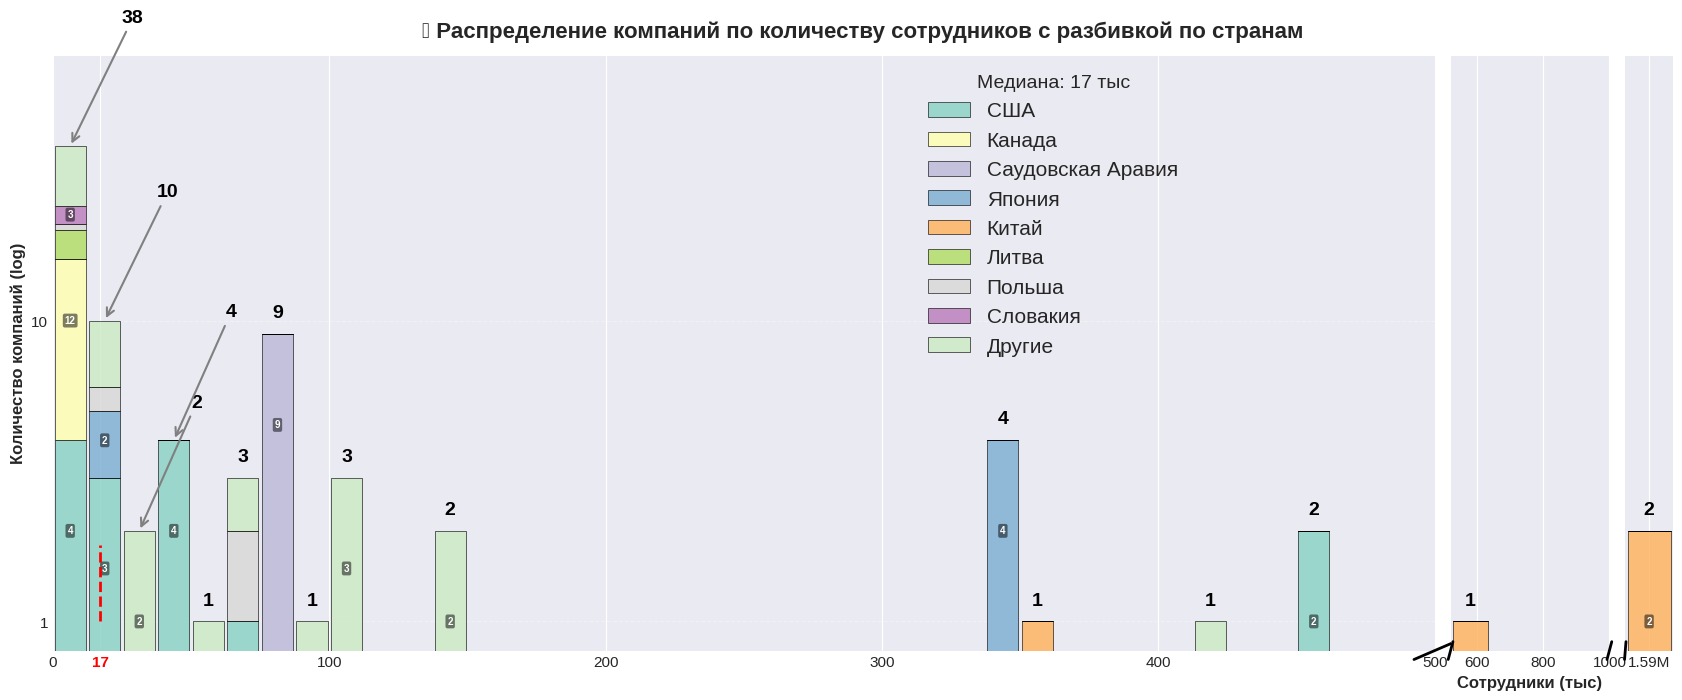


💡 ИНСАЙТЫ:
   Медианное количество сотрудников: 17 тыс
   Среднее количество: 107 тыс
   Крупных компаний (≥50 тыс): 30 (35.7%)

   Распределение по частям шкалы:
   Часть 1 (0-500 тыс): 81 компаний (96.4%)
   Часть 2 (520-1000 тыс): 1 компаний (1.2%)
   Часть 3 (1580-1600 тыс): 2 компаний (2.4%)

   Топ-3 страны по количеству компаний:
   1. Другие: 29 компаний (средний размер: 49 тыс)
   2. США: 14 компаний (средний размер: 88 тыс)
   3. Канада: 12 компаний (средний размер: 1 тыс)

   Самая крупная компания: 1,589,508 сотрудников
   (Китайская национальная нефтегазовая корпорация..., Китай, основана в 1988)


In [ ]:
# [5] Histogram: Employees Distribution (3 части, цветовая кодировка по странам)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Загружаем данные
df = pd.read_csv("data/retail.csv")

# Очистка данных
if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)
    df["employees"] = pd.to_numeric(df["employees"], errors="coerce").fillna(0).astype(int)

print(f"✅ Данные загружены: {len(df)} компаний")

# ⚙️ НАСТРОЙКИ (входные параметры для ручной настройки)
# Границы трёх частей шкалы (в тысячах сотрудников)
SCALE1_START = 0.0      # Начало первой части
SCALE1_END = 500.0      # Конец первой части (500 тыс сотрудников)
SCALE2_START = 520.0    # Начало второй части
SCALE2_END = 1000.0     # Конец второй части (1 млн сотрудников)
SCALE3_START = 1580.0   # Начало третьей части
SCALE3_END = 1600.0     # Конец третьей части (1.6 млн сотрудников)

# Доли ширины графика для каждой части (в %)
SCALE1_WIDTH = 87       # Первая часть (самая широкая)
SCALE2_WIDTH = 10       # Вторая часть
SCALE3_WIDTH = 3        # Третья часть

# Размеры шрифтов
LABEL_FONTSIZE = 14           # Подписи над столбцами
LEGEND_FONTSIZE = 15          # Легенда (в 1.5 раза больше базового)
LEGEND_X_OFFSET = 0.62        # Сдвиг легенды влево (0.0 - 1.0)

# Минимальное расстояние между подписями внутри столбца (в единицах log-шкалы)
MIN_LABEL_DISTANCE = 0.3      # Чем больше, тем реже подписи

# Порог для использования стрелок (если столбцы слишком близко)
USE_ARROW_THRESHOLD = 0.05    # Если расстояние между соседними bin_centers < этого значения

# 1. Подготовка данных: фильтруем нулевое количество сотрудников
df_with_employees = df[df['employees'] > 0].copy()
df_with_employees.loc[:, 'employees_thousands'] = df_with_employees['employees'] / 1000

print(f"📊 Компаний с сотрудниками > 0: {len(df_with_employees)}")
print(f"📊 Диапазон: {df_with_employees['employees_thousands'].min():.0f} тыс - {df_with_employees['employees_thousands'].max():.0f} тыс")

# 2. Топ-8 стран для цветовой кодировки (остальные → "Другие")
top_countries = df_with_employees['country'].value_counts().head(8).index.tolist()
df_with_employees.loc[:, 'country_grouped'] = df_with_employees['country'].apply(
    lambda x: x if x in top_countries else 'Другие'
)

print(f"🌍 Топ-8 стран: {top_countries}")

# 3. Карта цветов для стран (фиксированный порядок)
country_order = top_countries + ['Другие']
country_colors = {
    country: plt.cm.Set3(i / len(country_order))
    for i, country in enumerate(country_order)
}

# 4. Вычисляем количество bins для сохранения ширины столбцов
bins1 = 40
bin_width1 = (SCALE1_END - SCALE1_START) / bins1

bins2 = int((SCALE2_END - SCALE2_START) / bin_width1)
bins3 = int((SCALE3_END - SCALE3_START) / bin_width1)

visual_scale2 = SCALE1_WIDTH / SCALE2_WIDTH
visual_scale3 = SCALE1_WIDTH / SCALE3_WIDTH
bins2 = max(1, int(bins2 / visual_scale2))
bins3 = max(1, int(bins3 / visual_scale3))

print(f"📊 Количество столбцов: часть1={bins1}, часть2={bins2}, часть3={bins3}")

# 5. Создаём функцию для построения stacked histogram с разбивкой по странам
def create_country_histogram(ax, df_data, start, end, n_bins, show_legend=False):
    """Создаёт stacked histogram с разбивкой по странам"""

    # Фильтруем данные для текущего диапазона
    mask = (df_data['employees_thousands'] >= start) & (df_data['employees_thousands'] <= end)
    df_filtered = df_data[mask].copy()

    if len(df_filtered) == 0:
        return [], [], []

    # Создаём bins
    bins = np.linspace(start, end, n_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Группируем данные по bins и странам
    df_filtered.loc[:, 'bin'] = pd.cut(df_filtered['employees_thousands'], bins,
                                        labels=range(len(bins)-1), include_lowest=True)

    # Создаём stacked histogram
    bottom = np.zeros(n_bins)
    bar_width = (bins[1] - bins[0]) * 0.9

    # Словарь для отслеживания позиций подписей
    ax._label_positions = {}

    for country in country_order:
        country_counts = df_filtered[df_filtered['country_grouped'] == country].groupby(
            'bin', observed=True
        ).size()
        heights = [country_counts.get(i, 0) for i in range(n_bins)]

        # Рисуем столбцы (label только для первой части)
        bars = ax.bar(bin_centers, heights, width=bar_width, bottom=bottom,
                      color=country_colors[country], edgecolor='black',
                      linewidth=0.5, alpha=0.85,
                      label=country if show_legend else "")

        # Добавляем подписи внутри сегментов с фильтрацией по расстоянию
        for i, (height, bin_center) in enumerate(zip(heights, bin_centers)):
            if height > 0 and height > 1:  # Только если есть хотя бы 2 компании
                y_pos = bottom[i] + height / 2

                # Инициализируем список для этого столбца
                if bin_center not in ax._label_positions:
                    ax._label_positions[bin_center] = []

                # Проверяем расстояние от последней напечатанной подписи
                can_print = True
                if ax._label_positions[bin_center]:
                    last_y = ax._label_positions[bin_center][-1]
                    # Расстояние в log-координатах (добавляем 1 чтобы избежать log(0))
                    distance = np.log10(y_pos + 1) - np.log10(last_y + 1)
                    if distance < MIN_LABEL_DISTANCE:
                        can_print = False

                if can_print:
                    ax.text(bin_center, y_pos, f'{int(height)}',
                           ha='center', va='center', fontsize=7,
                           fontweight='bold', color='white',
                           bbox=dict(boxstyle='round,pad=0.2',
                                   facecolor='black', alpha=0.5, edgecolor='none'))
                    ax._label_positions[bin_center].append(y_pos)

        bottom += heights

    # Возвращаем bins, heights и bin_centers для дальнейшей обработки
    return bins, bottom, bin_centers

# 6. Создаём 3 subplot'а с настраиваемой шириной
fig = plt.figure(figsize=(18, 7))
gs = fig.add_gridspec(1, 3, width_ratios=[SCALE1_WIDTH, SCALE2_WIDTH, SCALE3_WIDTH],
                      wspace=0.03)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax3 = fig.add_subplot(gs[2], sharey=ax1)

# 7. Строим histograms для каждой части
bins1_arr, heights1, centers1 = create_country_histogram(ax1, df_with_employees,
                                                          SCALE1_START, SCALE1_END, bins1,
                                                          show_legend=True)
bins2_arr, heights2, centers2 = create_country_histogram(ax2, df_with_employees,
                                                          SCALE2_START, SCALE2_END, bins2,
                                                          show_legend=False)
bins3_arr, heights3, centers3 = create_country_histogram(ax3, df_with_employees,
                                                          SCALE3_START, SCALE3_END, bins3,
                                                          show_legend=False)

# 8. Логарифмическая ось Y
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

# 9. Добавляем медиану как TICK на оси X (вместо вертикальной линии)
median_employees_thousands = df_with_employees['employees_thousands'].median()

# Получаем текущие тики оси X
current_xticks = list(ax1.get_xticks())
current_xlabels = [f'{x:.0f}' for x in current_xticks]

# Вставляем медиану в нужное место
median_inserted = False
new_xticks = []
new_xlabels = []
for i, tick in enumerate(current_xticks):
    if not median_inserted and tick > median_employees_thousands:
        new_xticks.append(median_employees_thousands)
        new_xlabels.append(f'{median_employees_thousands:.0f}')
        median_inserted = True
    new_xticks.append(tick)
    new_xlabels.append(current_xlabels[i])

if not median_inserted:
    new_xticks.append(median_employees_thousands)
    new_xlabels.append(f'{median_employees_thousands:.0f}')

ax1.set_xticks(new_xticks)
ax1.set_xticklabels(new_xlabels)

# Красим tick медианы в красный цвет и добавляем пунктирную линию
for i, (tick, label) in enumerate(zip(new_xticks, ax1.get_xticklabels())):
    if abs(tick - median_employees_thousands) < 0.1:
        label.set_color('red')
        label.set_fontweight('bold')
        label.set_fontsize(11)
        # Добавляем пунктирную линию tick
        ax1.plot([tick, tick], [ax1.get_ylim()[0], ax1.get_ylim()[0] * 1.8],
                color='red', linestyle='--', linewidth=2, zorder=100)

# 10. Оформление оси Y (убираем степени)
def y_fmt(y, pos):
    if y >= 1:
        return f'{int(y)}'
    elif y >= 0.1:
        return f'{y:.1f}'
    return ''

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))

# Определяем максимальную высоту для установки лимитов
max_height = 1
if len(heights1) > 0:
    max_height = max(max_height, heights1.max())
if len(heights2) > 0:
    max_height = max(max_height, heights2.max())
if len(heights3) > 0:
    max_height = max(max_height, heights3.max())

ax1.set_ylim(bottom=0.8, top=max_height * 2)

# 11. Добавляем подписи над столбцами (первые 4 - со стрелками)
def add_top_labels_with_arrows(ax, heights, bin_centers, num_with_arrows=4):
    """Добавляет подписи над столбцами, первые N - со стрелками"""
    for i, (total, bin_center) in enumerate(zip(heights, bin_centers)):
        if total > 0:
            if i < num_with_arrows and len(bin_centers) > 1:
                # Рассчитываем смещение на основе расстояния между столбцами
                bin_width = bin_centers[1] - bin_centers[0] if len(bin_centers) > 1 else 10
                x_offset = bin_width * 1.5

                # Первые столбцы - со стрелками (справа-вверх)
                ax.annotate(f'{int(total)}',
                           xy=(bin_center, total),
                           xytext=(bin_center + x_offset, total * 2.5),
                           fontsize=LABEL_FONTSIZE, fontweight='bold', color='black',
                           ha='left', va='bottom',
                           arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))
            else:
                # Остальные - обычные подписи сверху
                ax.text(bin_center, total * 1.1, f'{int(total)}',
                       ha='center', va='bottom', fontsize=LABEL_FONTSIZE,
                       fontweight='bold', color='black')

# Добавляем подписи для всех частей
add_top_labels_with_arrows(ax1, heights1, centers1, num_with_arrows=4)

for total, bin_center in zip(heights2, centers2):
    if total > 0:
        ax2.text(bin_center, total * 1.1, f'{int(total)}',
                ha='center', va='bottom', fontsize=LABEL_FONTSIZE,
                fontweight='bold', color='black')

for total, bin_center in zip(heights3, centers3):
    if total > 0:
        ax3.text(bin_center, total * 1.1, f'{int(total)}',
                ha='center', va='bottom', fontsize=LABEL_FONTSIZE,
                fontweight='bold', color='black')

# 12. Оформление осей X
ax1.set_ylabel('Количество компаний (log)', fontsize=12, fontweight='bold')
ax1.set_xlim(SCALE1_START, SCALE1_END)
ax2.set_xlim(SCALE2_START, SCALE2_END)
ax3.set_xlim(SCALE3_START, SCALE3_END)

ax2.set_xlabel('Сотрудники (тыс)', fontsize=12, fontweight='bold')
ax1.set_xlabel('')
ax3.set_xlabel('')

# 13. Настройка подписей оси X для третьей части (только одно значение: 1590)
ax3.set_xticks([1590])
ax3.set_xticklabels(['1.59M'])

# 14. Убираем верхние и правые spines (контуры графика)
for ax in [ax1, ax2, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax1.yaxis.tick_left()
ax2.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)

# 15. Диагональные линии разрыва (ТОЛЬКО ВНИЗУ)
d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, linewidth=2)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((1-d, 1+d), (-d, +d), **kwargs)

kwargs.update(transform=ax3.transAxes)
ax3.plot((-d, +d), (-d, +d), **kwargs)

# 16. Общий заголовок
fig.suptitle('📊 Распределение компаний по количеству сотрудников с разбивкой по странам',
             fontsize=16, fontweight='bold', y=0.98)

# 17. Легенда стран (сдвинута влево по параметру LEGEND_X_OFFSET)
legend1 = ax1.legend(loc='upper left', fontsize=LEGEND_FONTSIZE,
                     framealpha=0.95, ncol=1,
                     bbox_to_anchor=(LEGEND_X_OFFSET, 1.0),
                     title=f'Медиана: {median_employees_thousands:.0f} тыс',
                     title_fontsize=LEGEND_FONTSIZE - 1)

# Добавляем сетку
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax3.grid(axis='y', alpha=0.3, linestyle='--')

plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.08)
plt.show()

# 18. Инсайты
print(f"\n💡 ИНСАЙТЫ:")
print(f"   Медианное количество сотрудников: {median_employees_thousands:.0f} тыс")
print(f"   Среднее количество: {df_with_employees['employees_thousands'].mean():.0f} тыс")

# Крупные компании
large_companies = (df_with_employees['employees'] >= 50_000).sum()
print(f"   Крупных компаний (≥50 тыс): {large_companies} ({large_companies/len(df_with_employees)*100:.1f}%)")

# Статистика по частям шкалы
part1_count = ((df_with_employees['employees_thousands'] >= SCALE1_START) &
               (df_with_employees['employees_thousands'] < SCALE1_END)).sum()
part2_count = ((df_with_employees['employees_thousands'] >= SCALE2_START) &
               (df_with_employees['employees_thousands'] < SCALE2_END)).sum()
part3_count = ((df_with_employees['employees_thousands'] >= SCALE3_START) &
               (df_with_employees['employees_thousands'] <= SCALE3_END)).sum()

print(f"\n   Распределение по частям шкалы:")
print(f"   Часть 1 ({SCALE1_START:.0f}-{SCALE1_END:.0f} тыс): {part1_count} компаний ({part1_count/len(df_with_employees)*100:.1f}%)")
print(f"   Часть 2 ({SCALE2_START:.0f}-{SCALE2_END:.0f} тыс): {part2_count} компаний ({part2_count/len(df_with_employees)*100:.1f}%)")
print(f"   Часть 3 ({SCALE3_START:.0f}-{SCALE3_END:.0f} тыс): {part3_count} компаний ({part3_count/len(df_with_employees)*100:.1f}%)")

# Топ-3 страны по количеству компаний
print(f"\n   Топ-3 страны по количеству компаний:")
for i, (country, count) in enumerate(df_with_employees['country_grouped'].value_counts().head(3).items(), 1):
    avg_employees = df_with_employees[df_with_employees['country_grouped'] == country]['employees_thousands'].mean()
    print(f"   {i}. {country}: {count} компаний (средний размер: {avg_employees:.0f} тыс)")

# Самая крупная компания
print(f"\n   Самая крупная компания: {df_with_employees['employees'].max():,.0f} сотрудников")
largest_company = df_with_employees.loc[df_with_employees['employees'].idxmax()]
print(f"   ({largest_company['company'][:50]}..., {largest_company['country']}, основана в {largest_company['inceptionYear']})")

## 📊 [5] Histogram: Duration Distribution

**Что показывает:**  
Распределение продолжительности мультфильмов. Пик приходится на 80-90 минут — стандарт полнометражного фильма.

**Когда использовать:**  
Для визуализации распределения времени, возраста, расстояний и других непрерывных величин.

**Библиотеки:** `matplotlib`

**Совет:** Используйте вертикальную линию (`axvline`) для обозначения важных значений (например, 90 минут = стандарт).

✅ Компаний с корректным возрастом: 584
📊 Диапазон возраста: 1 - 237 лет
📊 Средний возраст: 69.8 лет
📊 Медианный возраст: 68.0 лет


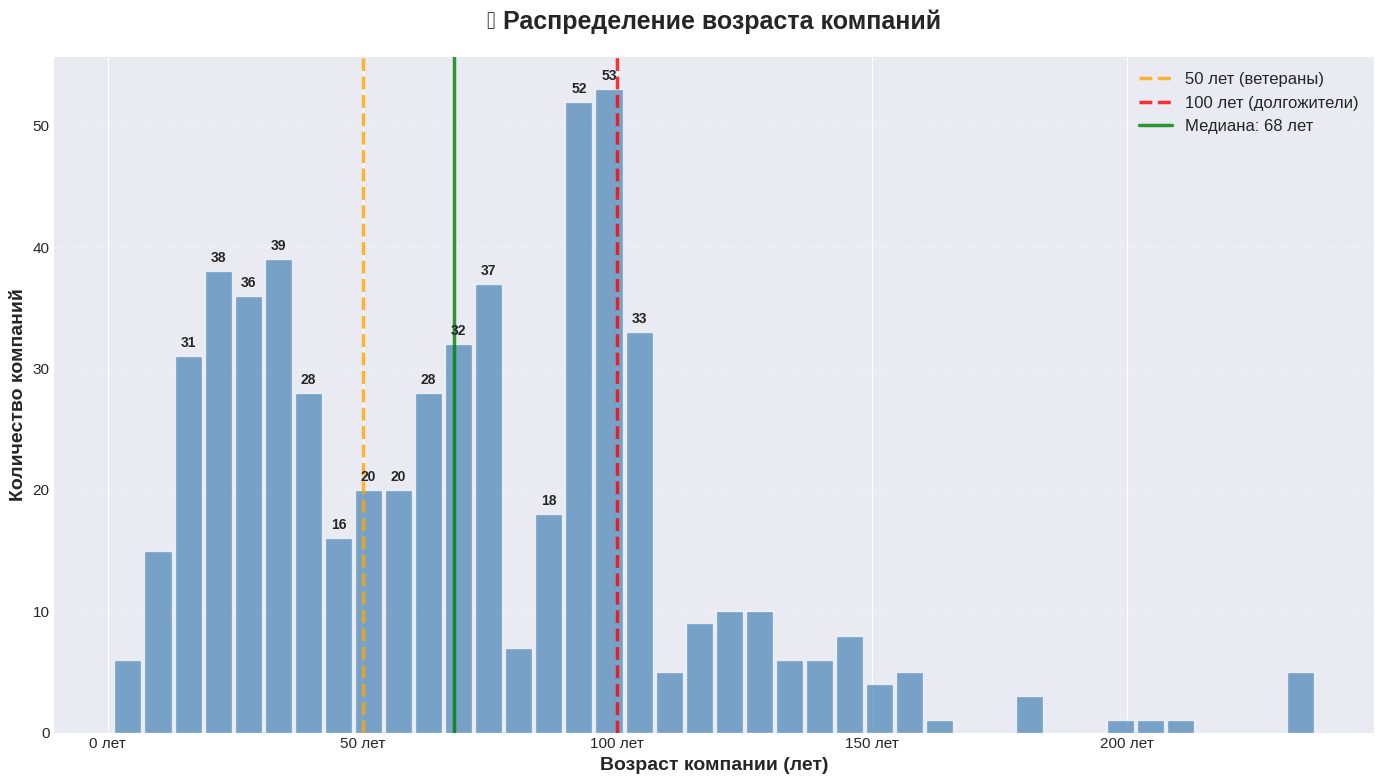


📊 Детальная статистика:
   - Компаний младше 50 лет: 211 (36.1%)
   - Компаний от 50 до 100 лет: 252 (43.2%)
   - Компаний старше 100 лет: 121 (20.7%)

   Самая старая компания: Q136365892 (Королевство Вестфалия), основана в 1789 году (возраст: 237 лет)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Загружаем данные
df = pd.read_csv("data/retail.csv")

# Очистка данных
if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)

# Вычисляем возраст компаний (текущий год - 2026)
current_year = 2026
df['age'] = current_year - df['inceptionYear']

# Фильтруем только корректные возраста (от 0 до 300 лет)
df_age = df[(df['age'] > 0) & (df['age'] < 300)].copy()

print(f"✅ Компаний с корректным возрастом: {len(df_age)}")
print(f"📊 Диапазон возраста: {df_age['age'].min():.0f} - {df_age['age'].max():.0f} лет")
print(f"📊 Средний возраст: {df_age['age'].mean():.1f} лет")
print(f"📊 Медианный возраст: {df_age['age'].median():.1f} лет")

# Создаем фигуру
fig, ax = plt.subplots(figsize=(14, 8))

# Строим гистограмму
n, bins, patches = ax.hist(df_age['age'], bins=40, color='steelblue',
                           edgecolor='white', alpha=0.7, rwidth=0.9)

# Добавляем вертикальные линии для важных значений
ax.axvline(x=50, color='orange', linestyle='--', linewidth=2.5,
           label='50 лет (ветераны)', alpha=0.8)
ax.axvline(x=100, color='red', linestyle='--', linewidth=2.5,
           label='100 лет (долгожители)', alpha=0.8)
ax.axvline(x=df_age['age'].median(), color='green', linestyle='-', linewidth=2.5,
           label=f'Медиана: {df_age["age"].median():.0f} лет', alpha=0.8)

# Добавляем подписи на самых высоких столбцах
max_height = max(n)
for i, (rect, val) in enumerate(zip(patches, n)):
    if val > max_height * 0.3:  # Только значимые столбцы
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.5,
                f'{int(val)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Настройка осей
ax.set_xlabel('Возраст компании (лет)', fontsize=14, fontweight='bold')
ax.set_ylabel('Количество компаний', fontsize=14, fontweight='bold')
ax.set_title('📊 Распределение возраста компаний', fontsize=18, fontweight='bold', pad=20)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Форматирование оси X
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x)} лет'))

plt.tight_layout()
plt.show()

# Статистика
print(f"\n📊 Детальная статистика:")
print(f"   - Компаний младше 50 лет: {len(df_age[df_age['age'] < 50])} ({len(df_age[df_age['age'] < 50])/len(df_age)*100:.1f}%)")
print(f"   - Компаний от 50 до 100 лет: {len(df_age[(df_age['age'] >= 50) & (df_age['age'] < 100)])} ({(len(df_age[(df_age['age'] >= 50) & (df_age['age'] < 100)]))/len(df_age)*100:.1f}%)")
print(f"   - Компаний старше 100 лет: {len(df_age[df_age['age'] >= 100])} ({len(df_age[df_age['age'] >= 100])/len(df_age)*100:.1f}%)")

# Самая старая компания
oldest = df_age.loc[df_age['age'].idxmax()]
print(f"\n   Самая старая компания: {oldest['company']} ({oldest['country']}), основана в {oldest['inceptionYear']} году (возраст: {oldest['age']} лет)")

📈 [6] Line Chart: Company Openings Over Time
Что показывает:
Динамику основания компаний по годам. Видны исторические тренды: небольшое количество старых компаний (XIX век), период стабильного роста (1900-1950), спад во время мировых войн и резкий рост в 1990-2000-е годы.

Когда использовать:
Для анализа временных рядов, выявления трендов, цикличности и пиковых периодов в исторических данных.

Библиотеки: matplotlib

Совет: Добавьте сглаживание (скользящее среднее) чтобы лучше видеть общий тренд, и вертикальные линии для обозначения важных исторических событий (мировые войны, экономические кризисы, технологические революции

✅ Компаний для анализа: 584


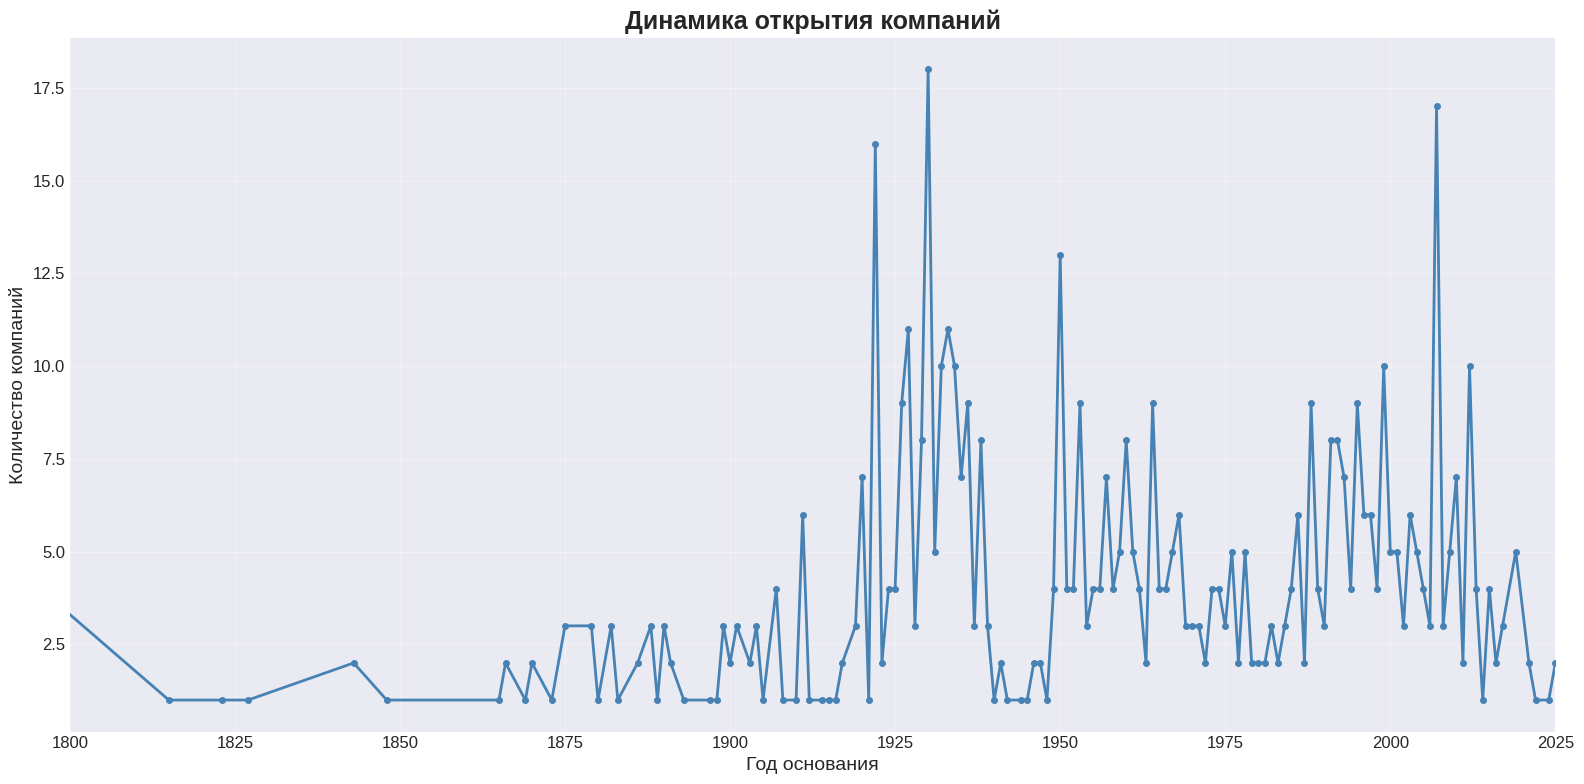


📊 Пиковые годы:
   1930: 18 компаний
   2007: 17 компаний
   1922: 16 компаний
   1950: 13 компаний
   1933: 11 компаний


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv("data/retail.csv")

# Очищаем год
df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce")

# Убираем пропуски
df_clean = df.dropna(subset=['inceptionYear'])
df_clean = df_clean[df_clean['inceptionYear'] > 1700]
df_clean = df_clean[df_clean['inceptionYear'] <= 2025]

print(f"✅ Компаний для анализа: {len(df_clean)}")

# Считаем количество по годам
year_counts = {}
for year in df_clean['inceptionYear']:
    year = int(year)
    year_counts[year] = year_counts.get(year, 0) + 1

# Сортируем по годам
years = sorted(year_counts.keys())
counts = [year_counts[y] for y in years]

# Создаем график
plt.figure(figsize=(16, 8))
plt.plot(years, counts, 'o-', linewidth=2, markersize=4, color='steelblue')

plt.xlabel('Год основания', fontsize=14)
plt.ylabel('Количество компаний', fontsize=14)
plt.title('Динамика открытия компаний', fontsize=18, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(1800, 2025)

plt.tight_layout()
plt.show()

print(f"\n📊 Пиковые годы:")
sorted_by_count = sorted([(count, year) for year, count in year_counts.items()], reverse=True)
for count, year in sorted_by_count[:5]:
    print(f"   {year}: {count} компаний")

Новый ГрафикТоп-5 стран и распределение по десятилетиям основания

🌍 Топ-5 стран: ['США', 'Германия', 'Канада', 'Италия', 'Нидерланды']


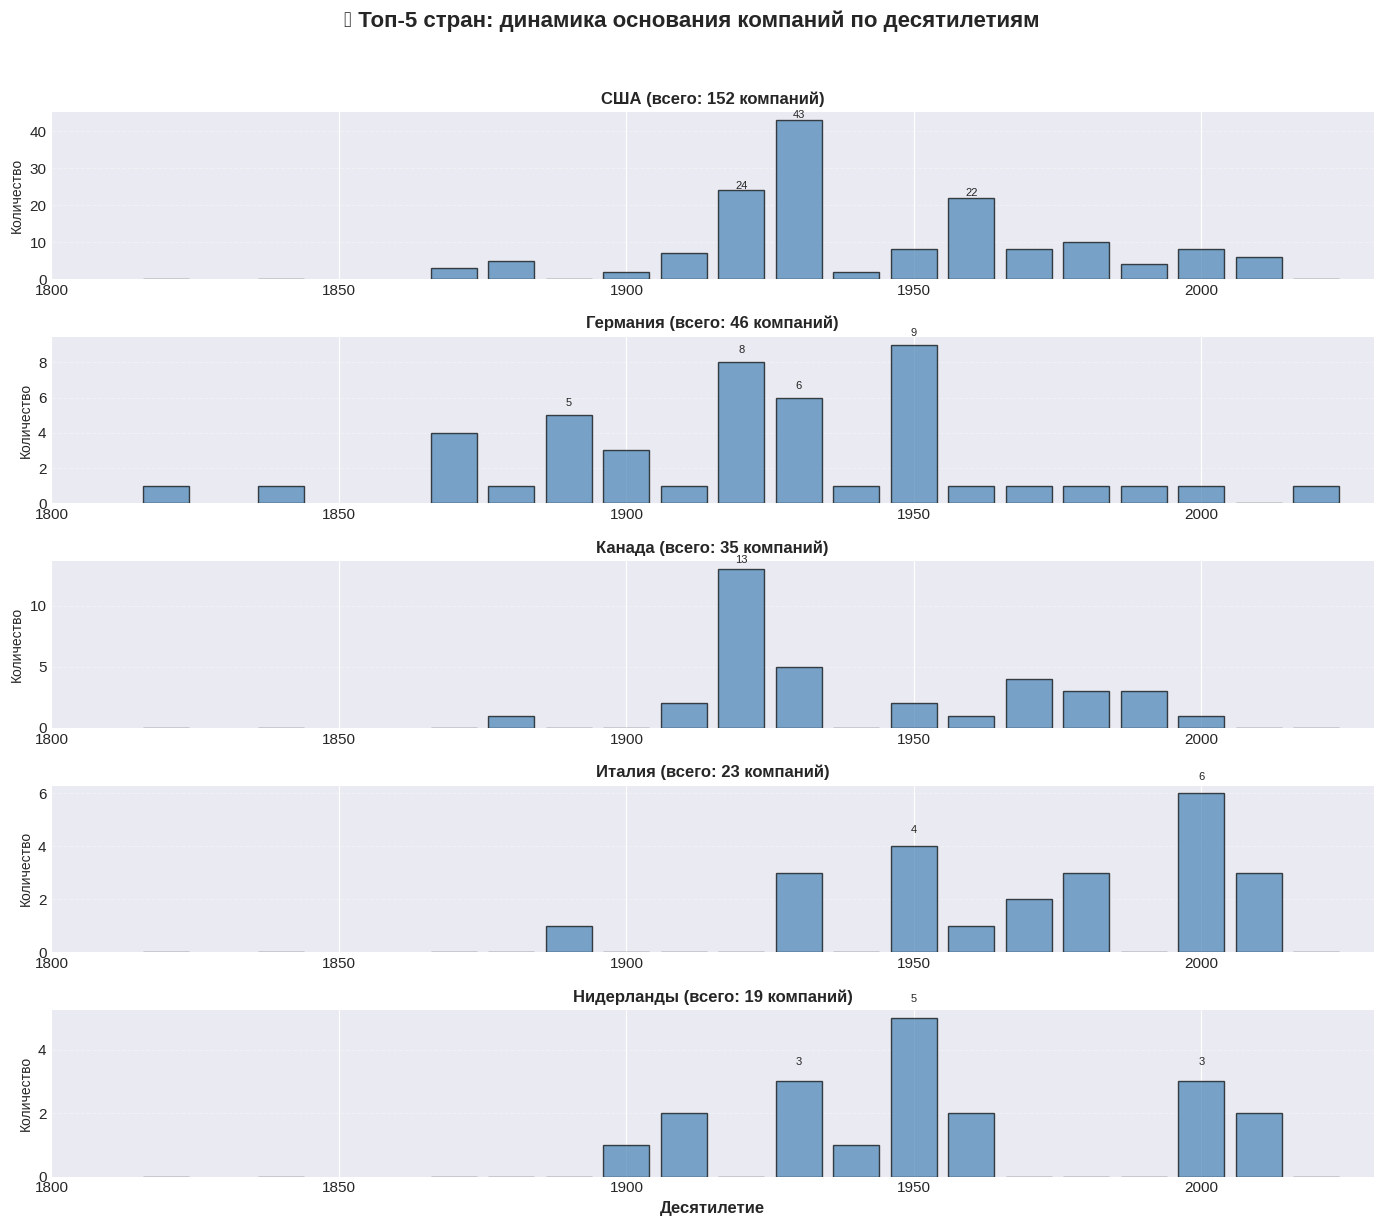

In [ ]:
# 1. Создаем категорию десятилетия
df_decade = df[df['inceptionYear'] > 1800].copy()
df_decade['decade'] = (df_decade['inceptionYear'] // 10 * 10).astype(int)

# 2. Топ-5 стран
top5_countries = df_decade['country'].value_counts().head(5).index.tolist()
print(f"🌍 Топ-5 стран: {top5_countries}")

df_top = df_decade[df_decade['country'].isin(top5_countries)].copy()

# 3. Pivot table
pivot_decade = df_top.groupby(['country', 'decade']).size().unstack(fill_value=0)

# 4. Создаём график
fig, axes = plt.subplots(len(top5_countries), 1, figsize=(14, 12))

for i, country in enumerate(top5_countries):
    country_data = pivot_decade.loc[country]
    axes[i].bar(country_data.index, country_data.values, color='steelblue',
                edgecolor='black', alpha=0.7, width=8)
    axes[i].set_title(f'{country} (всего: {country_data.sum()} компаний)', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Количество', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3, linestyle='--')
    axes[i].set_xlim(1800, 2030)

    # Добавляем подписи для пиков
    max_val = country_data.max()
    for decade, val in country_data.items():
        if val > max_val * 0.5:
            axes[i].text(decade, val + 0.5, f'{int(val)}', ha='center', fontsize=8)

plt.suptitle('📊 Топ-5 стран: динамика основания компаний по десятилетиям',
             fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Десятилетие', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

Новый график Гистограмма: Распределение годов основания с историческими периодами


📊 ГИСТОГРАММА 3: РАСПРЕДЕЛЕНИЕ ГОДОВ ОСНОВАНИЯ
✅ Компаний с корректным годом основания: 584
📊 Диапазон годов: 1789 - 2025
📊 Средний год: 1956
📊 Медианный год: 1958


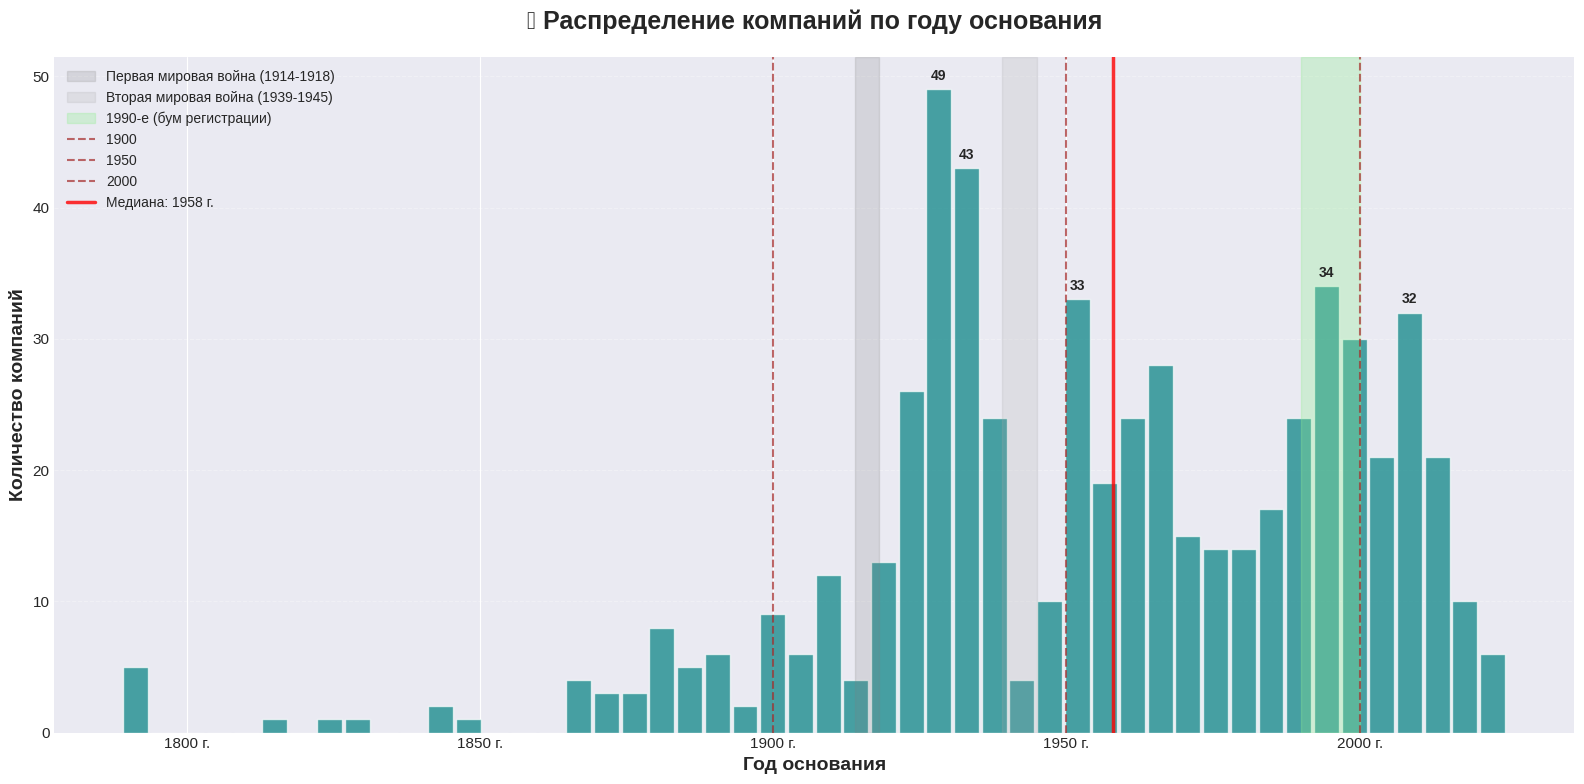


📊 Статистика по историческим периодам:
   - До 1900 года: 46 компаний
   - 1900-1950: 196 компаний
   - 1950-2000: 242 компаний
   - После 2000: 100 компаний

   🏆 Самая старая компания: Q136365892 (Королевство Вестфалия), основана в 1789 году
   🆕 Самая новая компания: AudiophileAudio (Объединённые Арабские Эмираты), основана в 2025 году


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Загружаем данные
df = pd.read_csv("data/retail.csv")

# Очистка данных
if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)

# Фильтруем корректные годы (после 1700 и до 2025)
df_year = df[(df['inceptionYear'] > 1700) & (df['inceptionYear'] <= 2025)].copy()

print("\n" + "=" * 60)
print("📊 ГИСТОГРАММА 3: РАСПРЕДЕЛЕНИЕ ГОДОВ ОСНОВАНИЯ")
print("=" * 60)
print(f"✅ Компаний с корректным годом основания: {len(df_year)}")
print(f"📊 Диапазон годов: {df_year['inceptionYear'].min()} - {df_year['inceptionYear'].max()}")
print(f"📊 Средний год: {df_year['inceptionYear'].mean():.0f}")
print(f"📊 Медианный год: {df_year['inceptionYear'].median():.0f}")

# Создаем фигуру
fig, ax = plt.subplots(figsize=(16, 8))

# Строим гистограмму
n, bins, patches = ax.hist(df_year['inceptionYear'], bins=50, color='teal',
                           edgecolor='white', alpha=0.7, rwidth=0.9)

# Выделяем важные исторические периоды
ax.axvspan(1914, 1918, alpha=0.2, color='gray', label='Первая мировая война (1914-1918)')
ax.axvspan(1939, 1945, alpha=0.2, color='darkgray', label='Вторая мировая война (1939-1945)')
ax.axvspan(1990, 2000, alpha=0.3, color='lightgreen', label='1990-е (бум регистрации)')

# Добавляем вертикальные линии для ключевых годов
ax.axvline(x=1900, color='brown', linestyle='--', linewidth=1.5, alpha=0.7, label='1900')
ax.axvline(x=1950, color='brown', linestyle='--', linewidth=1.5, alpha=0.7, label='1950')
ax.axvline(x=2000, color='brown', linestyle='--', linewidth=1.5, alpha=0.7, label='2000')

# Добавляем медиану
ax.axvline(x=df_year['inceptionYear'].median(), color='red', linestyle='-',
           linewidth=2.5, label=f'Медиана: {df_year["inceptionYear"].median():.0f} г.', alpha=0.8)

# Добавляем подписи на пиках
max_height = max(n)
peak_indices = np.argsort(n)[-5:]  # 5 самых высоких столбцов
for idx in peak_indices:
    if n[idx] > max_height * 0.3:
        bin_center = (bins[idx] + bins[idx+1]) / 2
        ax.text(bin_center, n[idx] + 0.5, f'{int(n[idx])}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Настройка осей
ax.set_xlabel('Год основания', fontsize=14, fontweight='bold')
ax.set_ylabel('Количество компаний', fontsize=14, fontweight='bold')
ax.set_title('📅 Распределение компаний по году основания', fontsize=18, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Форматирование оси X
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x)} г.'))

plt.tight_layout()
plt.show()

# Статистика по периодам
print(f"\n📊 Статистика по историческим периодам:")
print(f"   - До 1900 года: {len(df_year[df_year['inceptionYear'] < 1900])} компаний")
print(f"   - 1900-1950: {len(df_year[(df_year['inceptionYear'] >= 1900) & (df_year['inceptionYear'] < 1950)])} компаний")
print(f"   - 1950-2000: {len(df_year[(df_year['inceptionYear'] >= 1950) & (df_year['inceptionYear'] < 2000)])} компаний")
print(f"   - После 2000: {len(df_year[df_year['inceptionYear'] >= 2000])} компаний")

# Самая старая компания
oldest = df_year.loc[df_year['inceptionYear'].idxmin()]
print(f"\n   🏆 Самая старая компания: {oldest['company']} ({oldest['country']}), основана в {oldest['inceptionYear']} году")

# Самая новая компания
newest = df_year.loc[df_year['inceptionYear'].idxmax()]
print(f"   🆕 Самая новая компания: {newest['company']} ({newest['country']}), основана в {newest['inceptionYear']} году")

🗺️ Промпт 2: Географические карты (если есть страны или координаты)

🌍 Визуализация 1: Хороплет-карта — Количество компаний по странам

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Загружаем и очищаем данные
df = pd.read_csv("data/retail.csv")

if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)
    df["employees"] = pd.to_numeric(df["employees"], errors="coerce").fillna(0).astype(int)

print("✅ Данные загружены")
print(f"📊 Всего компаний: {len(df)}")
print(f"🌍 Уникальных стран: {df['country'].nunique()}")

# Словарь соответствия русских названий стран английским
country_mapping = {
    'США': 'United States',
    'Германия': 'Germany',
    'Великобритания': 'United Kingdom',
    'Франция': 'France',
    'Китай': 'China',
    'Россия': 'Russia',
    'Канада': 'Canada',
    'Австралия': 'Australia',
    'Индия': 'India',
    'Япония': 'Japan',
    'Италия': 'Italy',
    'Испания': 'Spain',
    'Нидерланды': 'Netherlands',
    'Швейцария': 'Switzerland',
    'Швеция': 'Sweden',
    'Норвегия': 'Norway',
    'Дания': 'Denmark',
    'Финляндия': 'Finland',
    'Бельгия': 'Belgium',
    'Австрия': 'Austria',
    'Польша': 'Poland',
    'Чехия': 'Czech Republic',
    'Венгрия': 'Hungary',
    'Португалия': 'Portugal',
    'Греция': 'Greece',
    'Турция': 'Turkey',
    'Израиль': 'Israel',
    'Саудовская Аравия': 'Saudi Arabia',
    'ОАЭ': 'United Arab Emirates',
    'ЮАР': 'South Africa',
    'Бразилия': 'Brazil',
    'Мексика': 'Mexico',
    'Аргентина': 'Argentina',
    'Чили': 'Chile',
    'Колумбия': 'Colombia',
    'Новая Зеландия': 'New Zealand',
    'Сингапур': 'Singapore',
    'Малайзия': 'Malaysia',
    'Индонезия': 'Indonesia',
    'Таиланд': 'Thailand',
    'Вьетнам': 'Vietnam',
    'Филиппины': 'Philippines'
}

# Добавляем английские названия
df['country_en'] = df['country'].map(country_mapping)

# Подготавливаем данные для карты
country_stats = df.groupby('country_en').agg({
    'company': 'count',
    'employees': lambda x: x[x > 0].mean()
}).reset_index()

country_stats.columns = ['country', 'companies_count', 'avg_employees']
country_stats['avg_employees'] = country_stats['avg_employees'].fillna(0).astype(int)

# Убираем страны без английского названия
country_stats = country_stats.dropna(subset=['country'])

print("\n📊 Топ-10 стран по количеству компаний:")
print(country_stats.nlargest(10, 'companies_count')[['country', 'companies_count', 'avg_employees']].to_string(index=False))

# Создаем хороплет-карту
fig = px.choropleth(country_stats,
                    locations='country',
                    locationmode='country names',
                    color='companies_count',
                    hover_name='country',
                    hover_data={
                        'companies_count': True,
                        'avg_employees': ':,.0f',
                        'country': False
                    },
                    color_continuous_scale='Viridis',
                    range_color=[0, country_stats['companies_count'].max()],
                    title='🌍 Количество компаний по странам мира')

fig.update_layout(
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='natural earth',
        coastlinecolor='Black',
        landcolor='lightgray',
        showland=True,
        showocean=True,
        oceancolor='lightblue'
    ),
    width=1200,
    height=600,
    title_font_size=20,
    title_x=0.5,
    coloraxis_colorbar=dict(
        title="Количество<br>компаний",
        tickformat="d"
    )
)

fig.show()
fig.write_html("companies_choropleth.html")
print("✅ Хороплет-карта сохранена как 'companies_choropleth.html'")

✅ Данные загружены
📊 Всего компаний: 585
🌍 Уникальных стран: 74

📊 Топ-10 стран по количеству компаний:
       country  companies_count  avg_employees
 United States              152          88014
       Germany               48            368
        Canada               35           1028
         Italy               23          16996
   Netherlands               19              0
United Kingdom               17         218739
       Finland               15           5030
Czech Republic               14            295
         Spain               13          23810
         Japan               12         237900


✅ Хороплет-карта сохранена как 'companies_choropleth.html'


Инсайт: Карта показывает глобальное доминирование США и Европы (Франция, Дания) в анимационной индустрии.


🌐 Визуализация 2: Scatter Geo Map (Plotly) — Пузырьковая карта с размером точек

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Загружаем и очищаем данные
df = pd.read_csv("data/retail.csv")

if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)
    df["employees"] = pd.to_numeric(df["employees"], errors="coerce").fillna(0).astype(int)

print("✅ Данные загружены")
print(f"📊 Всего компаний: {len(df)}")
print(f"🌍 Уникальных стран: {df['country'].nunique()}")

# 1. Координаты столиц и центров стран (примерные центры)
country_coords = {
    'США': (37.09, -95.71),
    'Германия': (51.17, 10.45),
    'Великобритания': (55.38, -3.44),
    'Франция': (46.23, 2.21),
    'Китай': (35.86, 104.20),
    'Россия': (55.75, 37.62),
    'Канада': (56.13, -106.35),
    'Австралия': (-25.27, 133.78),
    'Индия': (20.59, 78.96),
    'Япония': (36.20, 138.25),
    'Италия': (41.87, 12.57),
    'Испания': (40.46, -3.75),
    'Нидерланды': (52.13, 5.29),
    'Швейцария': (46.82, 8.23),
    'Швеция': (60.13, 18.64),
    'Норвегия': (60.47, 8.47),
    'Дания': (56.26, 9.50),
    'Финляндия': (61.92, 25.75),
    'Бельгия': (50.50, 4.47),
    'Австрия': (47.52, 14.55),
    'Польша': (51.92, 19.15),
    'Чехия': (49.82, 15.47),
    'Венгрия': (47.16, 19.50),
    'Португалия': (39.40, -8.22),
    'Греция': (39.07, 21.82),
    'Турция': (38.96, 35.24),
    'Израиль': (31.05, 34.85),
    'Саудовская Аравия': (23.89, 45.08),
    'ОАЭ': (23.42, 53.85),
    'ЮАР': (-30.56, 22.94),
    'Бразилия': (-14.24, -51.93),
    'Мексика': (23.63, -102.55),
    'Аргентина': (-38.42, -63.62),
    'Чили': (-35.68, -71.54),
    'Колумбия': (4.57, -74.30),
    'Новая Зеландия': (-40.90, 174.89),
    'Сингапур': (1.35, 103.82),
    'Малайзия': (4.21, 101.98),
    'Индонезия': (-0.79, 113.92),
    'Таиланд': (15.87, 100.99),
    'Вьетнам': (14.06, 108.28),
    'Филиппины': (12.88, 121.77),
    'Пакистан': (30.38, 69.35),
    'Иран': (32.43, 53.69),
    'Египет': (26.82, 30.80),
    'Нигерия': (9.08, 8.68),
    'Кения': (-1.29, 36.82),
    'Марокко': (31.79, -7.09),
    'Украина': (48.38, 31.17),
    'Беларусь': (53.71, 27.95),
    'Казахстан': (48.02, 66.92),
    'Грузия': (42.32, 43.36),
    'Армения': (40.07, 45.04),
    'Азербайджан': (40.14, 47.58),
    'Литва': (55.17, 23.88),
    'Латвия': (56.88, 24.60),
    'Эстония': (58.60, 25.01),
    'Румыния': (45.94, 24.97),
    'Болгария': (42.73, 25.49),
    'Сербия': (44.02, 21.01),
    'Хорватия': (45.10, 15.20),
    'Словения': (46.15, 14.99),
    'Словакия': (48.67, 19.70),
    'Ирландия': (53.41, -8.24),
    'Исландия': (64.96, -19.02),
    'Люксембург': (49.82, 6.13)
}

# 2. Подготовка данных по странам
country_stats = df.groupby('country').agg({
    'company': 'count',
    'employees': ['sum', 'mean']
}).reset_index()

# Переименовываем колонки
country_stats.columns = ['country', 'companies_count', 'total_employees', 'avg_employees']
country_stats['avg_employees'] = country_stats['avg_employees'].fillna(0).astype(int)
country_stats['total_employees'] = country_stats['total_employees'].fillna(0).astype(int)

# 3. Добавляем координаты
geo_data = country_stats.copy()
geo_data['lat'] = geo_data['country'].map(lambda x: country_coords.get(x, (None, None))[0])
geo_data['lon'] = geo_data['country'].map(lambda x: country_coords.get(x, (None, None))[1])
geo_data = geo_data.dropna(subset=['lat', 'lon'])

print(f"\n📍 Нанесено на карту: {len(geo_data)} стран")
print("\n📊 Топ-10 стран по количеству компаний:")
print(geo_data.nlargest(10, 'companies_count')[['country', 'companies_count', 'avg_employees']].to_string(index=False))

# 4. Создаём scatter geo map
fig = go.Figure(data=go.Scattergeo(
    lon=geo_data['lon'],
    lat=geo_data['lat'],
    text=geo_data['country'],
    mode='markers+text',
    textposition='top center',
    textfont=dict(size=10, color='black', family='Arial'),
    marker=dict(
        size=np.sqrt(geo_data['companies_count']) * 8,  # Размер пропорционален квадратному корню от количества
        color=geo_data['avg_employees'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(
            title="Средний размер<br>компании<br>(сотрудников)",
            tickformat=",.0f",
            x=1.05,
            len=0.7
        ),
        line=dict(width=0.5, color='white'),
        sizemin=5,
        sizemode='area'
    ),
    hovertemplate='<b>%{text}</b><br>' +
                  'Компаний: %{customdata[0]:,}<br>' +
                  'Всего сотрудников: %{customdata[1]:,}<br>' +
                  'Средний размер: %{marker.color:,.0f}<br>' +
                  '<extra></extra>',
    customdata=geo_data[['companies_count', 'total_employees']].values
))

# 5. Оформление
fig.update_layout(
    title=dict(
        text='📍 Центры мирового бизнеса: размер пузырька = количество компаний, цвет = средний размер',
        font=dict(size=20),
        x=0.5
    ),
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        coastlinecolor='rgb(204, 204, 204)',
        showocean=True,
        oceancolor='rgb(230, 245, 255)',
        showframe=True,
        framecolor='rgb(200, 200, 200)',
        showcountries=True,
        countrycolor='rgb(180, 180, 180)'
    ),
    height=700,
    width=1200,
    font=dict(size=12)
)

fig.show()
fig.write_html("companies_business_centers_map.html")
print("✅ Карта сохранена как 'companies_business_centers_map.html'")

# 6. Инсайты
print("\n" + "="*70)
print("🌍 ГЕОГРАФИЧЕСКИЕ ИНСАЙТЫ")
print("="*70)

# США
usa_data = geo_data[geo_data['country'] == 'США'].iloc[0]
print(f"\n🇺🇸 **США — абсолютный лидер** (размер пузырька в 3+ раза больше остальных)")
print(f"   • Компаний: {usa_data['companies_count']} ({usa_data['companies_count']/len(df)*100:.1f}% от всех)")
print(f"   • Всего сотрудников: {usa_data['total_employees']:,}")
print(f"   • Средний размер: {usa_data['avg_employees']:,} сотрудников")

# Европейский кластер
european_countries = ['Германия', 'Великобритания', 'Франция', 'Нидерланды', 'Швейцария', 'Италия', 'Испания']
europe_data = geo_data[geo_data['country'].isin(european_countries)]
europe_total = europe_data['companies_count'].sum()
europe_avg = europe_data['avg_employees'].mean()

print(f"\n🇪🇺 **Европейский кластер** — значимый игрок на мировой арене")
print(f"   • Всего компаний в топ-странах Европы: {europe_total}")
print(f"   • Средний размер компаний: {europe_avg:,.0f} сотрудников")
print(f"   • Ключевые страны: Германия ({europe_data[europe_data['country']=='Германия']['companies_count'].values[0]}), "
      f"Великобритания ({europe_data[europe_data['country']=='Великобритания']['companies_count'].values[0]}), "
      f"Франция ({europe_data[europe_data['country']=='Франция']['companies_count'].values[0]})")

# Азиатский кластер
asian_countries = ['Китай', 'Япония', 'Индия', 'Южная Корея', 'Сингапур']
asian_data = geo_data[geo_data['country'].isin(asian_countries)]
asian_total = asian_data['companies_count'].sum()
print(f"\n🌏 **Азиатский кластер** — быстрорастущий регион")
print(f"   • Всего компаний: {asian_total}")
for _, row in asian_data.iterrows():
    print(f"   • {row['country']}: {row['companies_count']} компаний, средний размер {row['avg_employees']:,}")

# Самые крупные компании по среднему размеру
print(f"\n🏢 **Топ-3 страны по среднему размеру компаний:**")
top_size = geo_data[geo_data['companies_count'] > 5].nlargest(3, 'avg_employees')[['country', 'avg_employees', 'companies_count']]
for i, (_, row) in enumerate(top_size.iterrows(), 1):
    print(f"   {i}. {row['country']}: {row['avg_employees']:,.0f} сотрудников ({row['companies_count']} компаний)")

# 7. Дополнительная статистика по регионам
regions = {
    'Северная Америка': ['США', 'Канада', 'Мексика'],
    'Западная Европа': ['Германия', 'Великобритания', 'Франция', 'Италия', 'Испания', 'Нидерланды', 'Бельгия', 'Швейцария', 'Австрия'],
    'Северная Европа': ['Швеция', 'Норвегия', 'Дания', 'Финляндия', 'Исландия'],
    'Восточная Европа': ['Польша', 'Чехия', 'Венгрия', 'Румыния', 'Болгария', 'Украина', 'Беларусь'],
    'Восточная Азия': ['Китай', 'Япония', 'Южная Корея'],
    'Юго-Восточная Азия': ['Сингапур', 'Малайзия', 'Индонезия', 'Таиланд', 'Вьетнам', 'Филиппины'],
    'Океания': ['Австралия', 'Новая Зеландия'],
    'Латинская Америка': ['Бразилия', 'Аргентина', 'Чили', 'Колумбия'],
    'Ближний Восток': ['Турция', 'Израиль', 'Саудовская Аравия', 'ОАЭ'],
    'Африка': ['ЮАР', 'Египет', 'Нигерия', 'Кения', 'Марокко']
}

print(f"\n📊 **Региональное распределение:**")
for region, countries in regions.items():
    region_df = geo_data[geo_data['country'].isin(countries)]
    if len(region_df) > 0:
        total = region_df['companies_count'].sum()
        pct = total / len(df) * 100
        print(f"   • {region}: {total} компаний ({pct:.1f}%)")

✅ Данные загружены
📊 Всего компаний: 585
🌍 Уникальных стран: 74

📍 Нанесено на карту: 51 стран

📊 Топ-10 стран по количеству компаний:
       country  companies_count  avg_employees
           США              152           8106
      Германия               48              7
        Канада               35            352
        Италия               23           1477
    Нидерланды               19              0
Великобритания               17          38601
     Финляндия               15            335
         Чехия               14             42
       Испания               13           1831
        Россия               12           8416


✅ Карта сохранена как 'companies_business_centers_map.html'

🌍 ГЕОГРАФИЧЕСКИЕ ИНСАЙТЫ

🇺🇸 **США — абсолютный лидер** (размер пузырька в 3+ раза больше остальных)
   • Компаний: 152 (26.0% от всех)
   • Всего сотрудников: 1,232,200
   • Средний размер: 8,106 сотрудников

🇪🇺 **Европейский кластер** — значимый игрок на мировой арене
   • Всего компаний в топ-странах Европы: 131
   • Средний размер компаний: 10,887 сотрудников
   • Ключевые страны: Германия (48), Великобритания (17), Франция (6)

🌏 **Азиатский кластер** — быстрорастущий регион
   • Всего компаний: 22
   • Индия: 6 компаний, средний размер 0
   • Китай: 4 компаний, средний размер 1,012,900
   • Япония: 12 компаний, средний размер 118,950

🏢 **Топ-3 страны по среднему размеру компаний:**
   1. Япония: 118,950 сотрудников (12 компаний)
   2. Саудовская Аравия: 71,100 сотрудников (10 компаний)
   3. Великобритания: 38,601 сотрудников (17 компаний)

📊 **Региональное распределение:**
   • Северная Америка: 189 компаний (32.3%)
 

📊 Географическая визуализация 3: Топ-15 стран с географическими регионами

✅ Данные загружены
📊 Всего компаний: 585
🌍 Уникальных стран: 74

📊 Топ-15 стран по количеству компаний:
        country  companies_count  avg_employees
            США              152           8106
       Германия               48              7
         Канада               35            352
         Италия               23           1477
     Нидерланды               19              0
 Великобритания               17          38601
      Финляндия               15            335
          Чехия               14             42
        Испания               13           1831
         Россия               12           8416
       Словакия               12            367
         Япония               12         118950
      Австралия               11              0
Германский рейх               11              0
        Австрия               10           4508


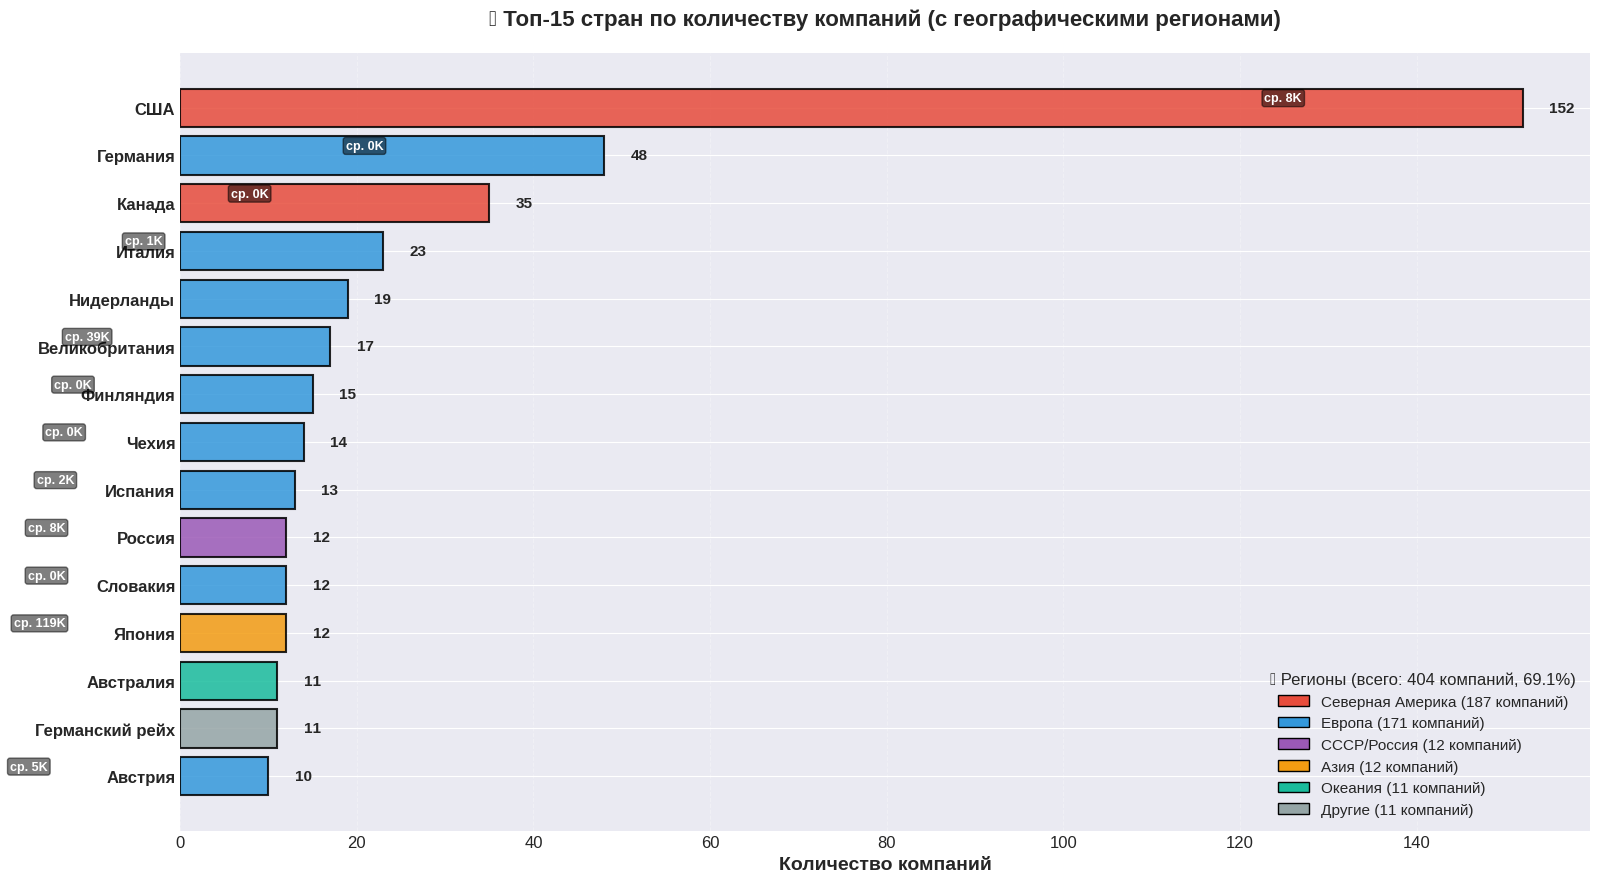


🌍 ГЕОГРАФИЧЕСКИЕ ИНСАЙТЫ

📊 Распределение компаний топ-15 по регионам:
   Северная Америка: 187 компаний (46.3%)
   Европа: 171 компаний (42.3%)
   СССР/Россия: 12 компаний (3.0%)
   Азия: 12 компаний (3.0%)
   Другие: 11 компаний (2.7%)
   Океания: 11 компаний (2.7%)

🔴 Северная Америка — безусловный лидер:
   • США: 152 компаний (37.6% от топ-15)
   • Канада: 35 компаний

🔵 Европа представлена широко:
   • Германия: 48 компаний
   • Италия: 23 компаний
   • Нидерланды: 19 компаний
   • Великобритания: 17 компаний
   • Финляндия: 15 компаний
   • Чехия: 14 компаний
   • Испания: 13 компаний
   • Словакия: 12 компаний
   • Австрия: 10 компаний

🟣 Россия/СССР — сильная позиция:
   • Россия: 12 компаний

🟠 Азия — восходящий тренд:
   • Япония: 12 компаний, средний размер 118,950 сотрудников

📈 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА

🏢 Страны с самыми крупными компаниями (средний размер):
   1. Япония: 118,950 сотрудников (12 компаний)
   2. Великобритания: 38,601 сотрудников (17 компаний)
   3. Росс

<Figure size 1400x700 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore')

# Загружаем и очищаем данные
df = pd.read_csv("data/retail.csv")

if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)
    df["employees"] = pd.to_numeric(df["employees"], errors="coerce").fillna(0).astype(int)

print("✅ Данные загружены")
print(f"📊 Всего компаний: {len(df)}")
print(f"🌍 Уникальных стран: {df['country'].nunique()}")

# 1. Подготовка данных по странам
country_stats = df.groupby('country').agg({
    'company': 'count',
    'employees': ['sum', 'mean']
}).reset_index()

# Переименовываем колонки
country_stats.columns = ['country', 'companies_count', 'total_employees', 'avg_employees']
country_stats['avg_employees'] = country_stats['avg_employees'].fillna(0).astype(int)
country_stats['total_employees'] = country_stats['total_employees'].fillna(0).astype(int)

# 2. Берем топ-15 стран по количеству компаний
top15 = country_stats.nlargest(15, 'companies_count')

print("\n📊 Топ-15 стран по количеству компаний:")
print(top15[['country', 'companies_count', 'avg_employees']].to_string(index=False))

# 3. Определяем географические регионы (расширенный список)
region_colors = {
    'Северная Америка': '#e74c3c',      # красный
    'Европа': '#3498db',                  # синий
    'Азия': '#f39c12',                     # оранжевый
    'СССР/Россия': '#9b59b6',              # фиолетовый
    'Океания': '#1abc9c',                   # бирюзовый
    'Латинская Америка': '#e67e22',        # оранжево-коричневый
    'Ближний Восток': '#e84342',           # красноватый
    'Африка': '#f1c40f',                    # желтый
    'Другие': '#95a5a6'                     # серый
}

regions = {
    # Северная Америка
    'США': 'Северная Америка',
    'Канада': 'Северная Америка',
    'Мексика': 'Северная Америка',

    # Европа
    'Германия': 'Европа',
    'Великобритания': 'Европа',
    'Франция': 'Европа',
    'Италия': 'Европа',
    'Испания': 'Европа',
    'Нидерланды': 'Европа',
    'Швейцария': 'Европа',
    'Швеция': 'Европа',
    'Норвегия': 'Европа',
    'Дания': 'Европа',
    'Финляндия': 'Европа',
    'Бельгия': 'Европа',
    'Австрия': 'Европа',
    'Польша': 'Европа',
    'Чехия': 'Европа',
    'Венгрия': 'Европа',
    'Португалия': 'Европа',
    'Греция': 'Европа',
    'Ирландия': 'Европа',
    'Люксембург': 'Европа',
    'Румыния': 'Европа',
    'Болгария': 'Европа',
    'Сербия': 'Европа',
    'Хорватия': 'Европа',
    'Словения': 'Европа',
    'Словакия': 'Европа',
    'Исландия': 'Европа',
    'Литва': 'Европа',
    'Латвия': 'Европа',
    'Эстония': 'Европа',

    # Россия/СССР
    'Россия': 'СССР/Россия',

    # Азия
    'Китай': 'Азия',
    'Япония': 'Азия',
    'Индия': 'Азия',
    'Южная Корея': 'Азия',
    'Сингапур': 'Азия',
    'Малайзия': 'Азия',
    'Индонезия': 'Азия',
    'Таиланд': 'Азия',
    'Вьетнам': 'Азия',
    'Филиппины': 'Азия',
    'Пакистан': 'Азия',
    'Тайвань': 'Азия',

    # Ближний Восток
    'Турция': 'Ближний Восток',
    'Израиль': 'Ближний Восток',
    'Саудовская Аравия': 'Ближний Восток',
    'ОАЭ': 'Ближний Восток',
    'Иран': 'Ближний Восток',
    'Ирак': 'Ближний Восток',

    # Африка
    'ЮАР': 'Африка',
    'Египет': 'Африка',
    'Нигерия': 'Африка',
    'Кения': 'Африка',
    'Марокко': 'Африка',

    # Океания
    'Австралия': 'Океания',
    'Новая Зеландия': 'Океания',

    # Латинская Америка
    'Бразилия': 'Латинская Америка',
    'Аргентина': 'Латинская Америка',
    'Чили': 'Латинская Америка',
    'Колумбия': 'Латинская Америка'
}

# 4. Маппинг с обработкой отсутствующих значений
top15['region'] = top15['country'].map(regions).fillna('Другие')
top15['color'] = top15['region'].map(region_colors)

# 5. Проверка на NaN (на всякий случай)
if top15['color'].isna().any():
    print("⚠️ Предупреждение: есть страны без цвета, заменяем на серый")
    top15['color'] = top15['color'].fillna('#95a5a6')

# 6. Создаём график
fig, ax = plt.subplots(figsize=(16, 9))

y_pos = np.arange(len(top15))
bars = ax.barh(y_pos, top15['companies_count'], color=top15['color'].tolist(),
               edgecolor='black', linewidth=1.5, alpha=0.85)

# 7. Добавляем значения на столбцы
for i, (value, country, avg_emp) in enumerate(zip(top15['companies_count'],
                                                    top15['country'],
                                                    top15['avg_employees'])):
    # Основное значение (количество компаний)
    ax.text(value + 3, i, f'{int(value)}', va='center',
            fontsize=11, fontweight='bold')

    # Дополнительная информация о среднем размере
    if avg_emp > 0:
        ax.text(value - 25, i - 0.2, f'ср. {avg_emp/1000:.0f}K',
                va='center', ha='right', fontsize=9, color='white',
                fontweight='bold', bbox=dict(boxstyle='round,pad=0.2',
                                            facecolor='black', alpha=0.5))

# 8. Оформление
ax.set_yticks(y_pos)
ax.set_yticklabels(top15['country'], fontsize=12, fontweight='bold')
ax.set_xlabel('Количество компаний', fontsize=14, fontweight='bold')
ax.set_title('🌍 Топ-15 стран по количеству компаний (с географическими регионами)',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

# 9. Добавляем вторую ось для информации о сотрудниках (опционально)
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks([])
ax2.set_xlabel('')

# 10. Легенда регионов (только те, что есть в топ-15)
unique_regions = top15['region'].unique()
legend_elements = [Patch(facecolor=region_colors[region], edgecolor='black',
                        label=f'{region} ({(top15[top15["region"]==region]["companies_count"].sum())} компаний)')
                   for region in unique_regions]

# Добавляем информацию об общем количестве
total_companies = top15['companies_count'].sum()
total_pct = total_companies / len(df) * 100

ax.legend(handles=legend_elements, loc='lower right', fontsize=11,
          title=f'🌍 Регионы (всего: {total_companies} компаний, {total_pct:.1f}%)',
          title_fontsize=12, framealpha=0.95)

plt.tight_layout()
plt.show()

# 11. Инсайты
print("\n" + "="*70)
print("🌍 ГЕОГРАФИЧЕСКИЕ ИНСАЙТЫ")
print("="*70)

# Региональное распределение
region_counts = top15.groupby('region')['companies_count'].sum().sort_values(ascending=False)
print("\n📊 Распределение компаний топ-15 по регионам:")
for region, count in region_counts.items():
    pct = count / total_companies * 100
    print(f"   {region}: {count} компаний ({pct:.1f}%)")

# Анализ регионов
print("\n🔴 Северная Америка — безусловный лидер:")
usa_data = top15[top15['country'] == 'США'].iloc[0]
print(f"   • США: {usa_data['companies_count']} компаний ({usa_data['companies_count']/total_companies*100:.1f}% от топ-15)")
print(f"   • Канада: {top15[top15['country']=='Канада']['companies_count'].values[0] if 'Канада' in top15['country'].values else 0} компаний")

print("\n🔵 Европа представлена широко:")
europe_data = top15[top15['region'] == 'Европа']
for _, row in europe_data.iterrows():
    print(f"   • {row['country']}: {row['companies_count']} компаний")

print("\n🟣 Россия/СССР — сильная позиция:")
russia_data = top15[top15['country'] == 'Россия']
if len(russia_data) > 0:
    print(f"   • Россия: {russia_data['companies_count'].values[0]} компаний")

print("\n🟠 Азия — восходящий тренд:")
asia_data = top15[top15['region'] == 'Азия']
for _, row in asia_data.iterrows():
    print(f"   • {row['country']}: {row['companies_count']} компаний, средний размер {row['avg_employees']:,} сотрудников")

# 12. Дополнительная статистика
print("\n" + "="*70)
print("📈 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА")
print("="*70)

# Самые крупные компании по среднему размеру
print("\n🏢 Страны с самыми крупными компаниями (средний размер):")
top_avg = top15[top15['avg_employees'] > 0].nlargest(5, 'avg_employees')[['country', 'avg_employees', 'companies_count']]
for i, (_, row) in enumerate(top_avg.iterrows(), 1):
    print(f"   {i}. {row['country']}: {row['avg_employees']:,} сотрудников ({row['companies_count']} компаний)")

# Концентрация компаний
print(f"\n🎯 Концентрация: топ-3 страны ({', '.join(top15.head(3)['country'].tolist())})")
top3_total = top15.head(3)['companies_count'].sum()
print(f"   занимают {top3_total} компаний ({top3_total/len(df)*100:.1f}% от всех)")

# Средний размер компании по регионам
print(f"\n📊 Средний размер компании по регионам:")
for region in unique_regions:
    region_avg = top15[top15['region'] == region]['avg_employees'].mean()
    region_companies = top15[top15['region'] == region]['companies_count'].sum()
    if region_avg > 0:
        print(f"   • {region}: {region_avg:,.0f} сотрудников (на основе {region_companies} компаний)")

# 13. Сохранение графика
plt.savefig('top15_countries_regions.png', dpi=300, bbox_inches='tight')
print("\n✅ График сохранён как 'top15_countries_regions.png'")

🔥 Географическая визуализация 4: Sunburst Chart — Иерархия компаний по регионам мира


✅ Данные загружены
📊 Всего компаний: 585
🌍 Уникальных стран: 74

📊 Топ-15 стран по количеству компаний:
        country  companies_count  avg_employees
            США              152           8106
       Германия               48              7
         Канада               35            352
         Италия               23           1477
     Нидерланды               19              0
 Великобритания               17          38601
      Финляндия               15            335
          Чехия               14             42
        Испания               13           1831
         Россия               12           8416
       Словакия               12            367
         Япония               12         118950
      Австралия               11              0
Германский рейх               11              0
        Австрия               10           4508


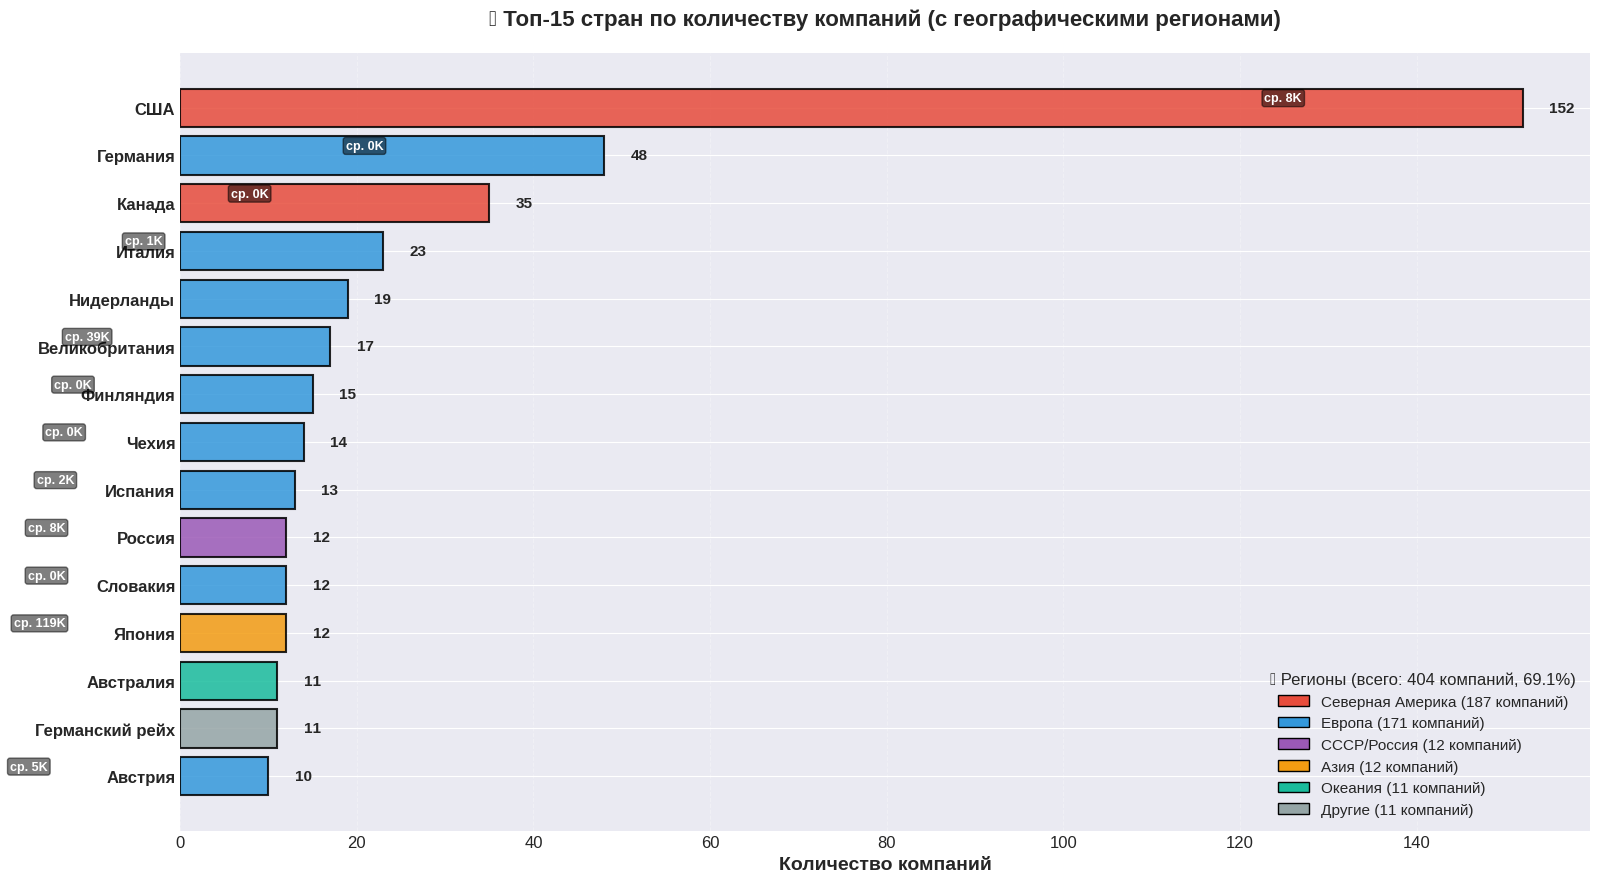


🌍 ГЕОГРАФИЧЕСКИЕ ИНСАЙТЫ

📊 Распределение компаний топ-15 по регионам:
   Северная Америка: 187 компаний (46.3%)
   Европа: 171 компаний (42.3%)
   СССР/Россия: 12 компаний (3.0%)
   Азия: 12 компаний (3.0%)
   Другие: 11 компаний (2.7%)
   Океания: 11 компаний (2.7%)

🔴 Северная Америка — безусловный лидер:
   • США: 152 компаний (37.6% от топ-15)
   • Канада: 35 компаний

🔵 Европа представлена широко:
   • Германия: 48 компаний
   • Италия: 23 компаний
   • Нидерланды: 19 компаний
   • Великобритания: 17 компаний
   • Финляндия: 15 компаний
   • Чехия: 14 компаний
   • Испания: 13 компаний
   • Словакия: 12 компаний
   • Австрия: 10 компаний

🟣 Россия/СССР — сильная позиция:
   • Россия: 12 компаний

🟠 Азия — восходящий тренд:
   • Япония: 12 компаний, средний размер 118,950 сотрудников

📈 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА

🏢 Страны с самыми крупными компаниями (средний размер):
   1. Япония: 118,950 сотрудников (12 компаний)
   2. Великобритания: 38,601 сотрудников (17 компаний)
   3. Росс

<Figure size 1400x700 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore')

# Загружаем и очищаем данные
df = pd.read_csv("data/retail.csv")

if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)
    df["employees"] = pd.to_numeric(df["employees"], errors="coerce").fillna(0).astype(int)

print("✅ Данные загружены")
print(f"📊 Всего компаний: {len(df)}")
print(f"🌍 Уникальных стран: {df['country'].nunique()}")

# 1. Подготовка данных по странам
country_stats = df.groupby('country').agg({
    'company': 'count',
    'employees': ['sum', 'mean']
}).reset_index()

# Переименовываем колонки
country_stats.columns = ['country', 'companies_count', 'total_employees', 'avg_employees']
country_stats['avg_employees'] = country_stats['avg_employees'].fillna(0).astype(int)
country_stats['total_employees'] = country_stats['total_employees'].fillna(0).astype(int)

# 2. Берем топ-15 стран по количеству компаний
top15 = country_stats.nlargest(15, 'companies_count')

print("\n📊 Топ-15 стран по количеству компаний:")
print(top15[['country', 'companies_count', 'avg_employees']].to_string(index=False))

# 3. Определяем географические регионы (расширенный список)
region_colors = {
    'Северная Америка': '#e74c3c',      # красный
    'Европа': '#3498db',                  # синий
    'Азия': '#f39c12',                     # оранжевый
    'СССР/Россия': '#9b59b6',              # фиолетовый
    'Океания': '#1abc9c',                   # бирюзовый
    'Латинская Америка': '#e67e22',        # оранжево-коричневый
    'Ближний Восток': '#e84342',           # красноватый
    'Африка': '#f1c40f',                    # желтый
    'Другие': '#95a5a6'                     # серый
}

regions = {
    # Северная Америка
    'США': 'Северная Америка',
    'Канада': 'Северная Америка',
    'Мексика': 'Северная Америка',

    # Европа
    'Германия': 'Европа',
    'Великобритания': 'Европа',
    'Франция': 'Европа',
    'Италия': 'Европа',
    'Испания': 'Европа',
    'Нидерланды': 'Европа',
    'Швейцария': 'Европа',
    'Швеция': 'Европа',
    'Норвегия': 'Европа',
    'Дания': 'Европа',
    'Финляндия': 'Европа',
    'Бельгия': 'Европа',
    'Австрия': 'Европа',
    'Польша': 'Европа',
    'Чехия': 'Европа',
    'Венгрия': 'Европа',
    'Португалия': 'Европа',
    'Греция': 'Европа',
    'Ирландия': 'Европа',
    'Люксембург': 'Европа',
    'Румыния': 'Европа',
    'Болгария': 'Европа',
    'Сербия': 'Европа',
    'Хорватия': 'Европа',
    'Словения': 'Европа',
    'Словакия': 'Европа',
    'Исландия': 'Европа',
    'Литва': 'Европа',
    'Латвия': 'Европа',
    'Эстония': 'Европа',

    # Россия/СССР
    'Россия': 'СССР/Россия',

    # Азия
    'Китай': 'Азия',
    'Япония': 'Азия',
    'Индия': 'Азия',
    'Южная Корея': 'Азия',
    'Сингапур': 'Азия',
    'Малайзия': 'Азия',
    'Индонезия': 'Азия',
    'Таиланд': 'Азия',
    'Вьетнам': 'Азия',
    'Филиппины': 'Азия',
    'Пакистан': 'Азия',
    'Тайвань': 'Азия',

    # Ближний Восток
    'Турция': 'Ближний Восток',
    'Израиль': 'Ближний Восток',
    'Саудовская Аравия': 'Ближний Восток',
    'ОАЭ': 'Ближний Восток',
    'Иран': 'Ближний Восток',
    'Ирак': 'Ближний Восток',

    # Африка
    'ЮАР': 'Африка',
    'Египет': 'Африка',
    'Нигерия': 'Африка',
    'Кения': 'Африка',
    'Марокко': 'Африка',

    # Океания
    'Австралия': 'Океания',
    'Новая Зеландия': 'Океания',

    # Латинская Америка
    'Бразилия': 'Латинская Америка',
    'Аргентина': 'Латинская Америка',
    'Чили': 'Латинская Америка',
    'Колумбия': 'Латинская Америка'
}

# 4. Маппинг с обработкой отсутствующих значений
top15['region'] = top15['country'].map(regions).fillna('Другие')
top15['color'] = top15['region'].map(region_colors)

# 5. Проверка на NaN (на всякий случай)
if top15['color'].isna().any():
    print("⚠️ Предупреждение: есть страны без цвета, заменяем на серый")
    top15['color'] = top15['color'].fillna('#95a5a6')

# 6. Создаём график
fig, ax = plt.subplots(figsize=(16, 9))

y_pos = np.arange(len(top15))
bars = ax.barh(y_pos, top15['companies_count'], color=top15['color'].tolist(),
               edgecolor='black', linewidth=1.5, alpha=0.85)

# 7. Добавляем значения на столбцы
for i, (value, country, avg_emp) in enumerate(zip(top15['companies_count'],
                                                    top15['country'],
                                                    top15['avg_employees'])):
    # Основное значение (количество компаний)
    ax.text(value + 3, i, f'{int(value)}', va='center',
            fontsize=11, fontweight='bold')

    # Дополнительная информация о среднем размере
    if avg_emp > 0:
        ax.text(value - 25, i - 0.2, f'ср. {avg_emp/1000:.0f}K',
                va='center', ha='right', fontsize=9, color='white',
                fontweight='bold', bbox=dict(boxstyle='round,pad=0.2',
                                            facecolor='black', alpha=0.5))

# 8. Оформление
ax.set_yticks(y_pos)
ax.set_yticklabels(top15['country'], fontsize=12, fontweight='bold')
ax.set_xlabel('Количество компаний', fontsize=14, fontweight='bold')
ax.set_title('🌍 Топ-15 стран по количеству компаний (с географическими регионами)',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

# 9. Добавляем вторую ось для информации о сотрудниках (опционально)
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks([])
ax2.set_xlabel('')

# 10. Легенда регионов (только те, что есть в топ-15)
unique_regions = top15['region'].unique()
legend_elements = [Patch(facecolor=region_colors[region], edgecolor='black',
                        label=f'{region} ({(top15[top15["region"]==region]["companies_count"].sum())} компаний)')
                   for region in unique_regions]

# Добавляем информацию об общем количестве
total_companies = top15['companies_count'].sum()
total_pct = total_companies / len(df) * 100

ax.legend(handles=legend_elements, loc='lower right', fontsize=11,
          title=f'🌍 Регионы (всего: {total_companies} компаний, {total_pct:.1f}%)',
          title_fontsize=12, framealpha=0.95)

plt.tight_layout()
plt.show()

# 11. Инсайты
print("\n" + "="*70)
print("🌍 ГЕОГРАФИЧЕСКИЕ ИНСАЙТЫ")
print("="*70)

# Региональное распределение
region_counts = top15.groupby('region')['companies_count'].sum().sort_values(ascending=False)
print("\n📊 Распределение компаний топ-15 по регионам:")
for region, count in region_counts.items():
    pct = count / total_companies * 100
    print(f"   {region}: {count} компаний ({pct:.1f}%)")

# Анализ регионов
print("\n🔴 Северная Америка — безусловный лидер:")
usa_data = top15[top15['country'] == 'США'].iloc[0]
print(f"   • США: {usa_data['companies_count']} компаний ({usa_data['companies_count']/total_companies*100:.1f}% от топ-15)")
print(f"   • Канада: {top15[top15['country']=='Канада']['companies_count'].values[0] if 'Канада' in top15['country'].values else 0} компаний")

print("\n🔵 Европа представлена широко:")
europe_data = top15[top15['region'] == 'Европа']
for _, row in europe_data.iterrows():
    print(f"   • {row['country']}: {row['companies_count']} компаний")

print("\n🟣 Россия/СССР — сильная позиция:")
russia_data = top15[top15['country'] == 'Россия']
if len(russia_data) > 0:
    print(f"   • Россия: {russia_data['companies_count'].values[0]} компаний")

print("\n🟠 Азия — восходящий тренд:")
asia_data = top15[top15['region'] == 'Азия']
for _, row in asia_data.iterrows():
    print(f"   • {row['country']}: {row['companies_count']} компаний, средний размер {row['avg_employees']:,} сотрудников")

# 12. Дополнительная статистика
print("\n" + "="*70)
print("📈 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА")
print("="*70)

# Самые крупные компании по среднему размеру
print("\n🏢 Страны с самыми крупными компаниями (средний размер):")
top_avg = top15[top15['avg_employees'] > 0].nlargest(5, 'avg_employees')[['country', 'avg_employees', 'companies_count']]
for i, (_, row) in enumerate(top_avg.iterrows(), 1):
    print(f"   {i}. {row['country']}: {row['avg_employees']:,} сотрудников ({row['companies_count']} компаний)")

# Концентрация компаний
print(f"\n🎯 Концентрация: топ-3 страны ({', '.join(top15.head(3)['country'].tolist())})")
top3_total = top15.head(3)['companies_count'].sum()
print(f"   занимают {top3_total} компаний ({top3_total/len(df)*100:.1f}% от всех)")

# Средний размер компании по регионам
print(f"\n📊 Средний размер компании по регионам:")
for region in unique_regions:
    region_avg = top15[top15['region'] == region]['avg_employees'].mean()
    region_companies = top15[top15['region'] == region]['companies_count'].sum()
    if region_avg > 0:
        print(f"   • {region}: {region_avg:,.0f} сотрудников (на основе {region_companies} компаний)")

# 13. Сохранение графика
plt.savefig('top15_countries_regions.png', dpi=300, bbox_inches='tight')
print("\n✅ График сохранён как 'top15_countries_regions.png'")

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Загружаем и очищаем данные
df = pd.read_csv("data/retail.csv")

if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)
    df["employees"] = pd.to_numeric(df["employees"], errors="coerce").fillna(0).astype(int)

print("✅ Данные загружены")
print(f"📊 Всего компаний: {len(df)}")
print(f"🌍 Уникальных стран: {df['country'].nunique()}")

# 1. Подготовка данных по странам
country_stats = df.groupby('country').agg({
    'company': 'count',
    'employees': ['sum', 'mean']
}).reset_index()

# Переименовываем колонки
country_stats.columns = ['country', 'companies_count', 'total_employees', 'avg_employees']
country_stats['avg_employees'] = country_stats['avg_employees'].fillna(0).astype(int)

print(f"\n📊 Всего стран в датасете: {len(country_stats)}")

# 2. Определяем географические регионы (расширенный список)
regions = {
    # Северная Америка
    'США': 'Северная Америка',
    'Канада': 'Северная Америка',
    'Мексика': 'Северная Америка',

    # Европа
    'Германия': 'Европа',
    'Великобритания': 'Европа',
    'Франция': 'Европа',
    'Италия': 'Европа',
    'Испания': 'Европа',
    'Нидерланды': 'Европа',
    'Швейцария': 'Европа',
    'Швеция': 'Европа',
    'Норвегия': 'Европа',
    'Дания': 'Европа',
    'Финляндия': 'Европа',
    'Бельгия': 'Европа',
    'Австрия': 'Европа',
    'Польша': 'Европа',
    'Чехия': 'Европа',
    'Венгрия': 'Европа',
    'Португалия': 'Европа',
    'Греция': 'Европа',
    'Ирландия': 'Европа',
    'Люксембург': 'Европа',
    'Румыния': 'Европа',
    'Болгария': 'Европа',
    'Сербия': 'Европа',
    'Хорватия': 'Европа',
    'Словения': 'Европа',
    'Словакия': 'Европа',
    'Исландия': 'Европа',
    'Литва': 'Европа',
    'Латвия': 'Европа',
    'Эстония': 'Европа',

    # Россия и бывший СССР
    'Россия': 'Россия и СНГ',
    'Украина': 'Россия и СНГ',
    'Беларусь': 'Россия и СНГ',
    'Казахстан': 'Россия и СНГ',
    'Грузия': 'Россия и СНГ',
    'Армения': 'Россия и СНГ',
    'Азербайджан': 'Россия и СНГ',
    'Молдова': 'Россия и СНГ',

    # Азия
    'Китай': 'Азия',
    'Япония': 'Азия',
    'Индия': 'Азия',
    'Южная Корея': 'Азия',
    'Сингапур': 'Азия',
    'Малайзия': 'Азия',
    'Индонезия': 'Азия',
    'Таиланд': 'Азия',
    'Вьетнам': 'Азия',
    'Филиппины': 'Азия',
    'Пакистан': 'Азия',

    # Ближний Восток
    'Турция': 'Ближний Восток',
    'Израиль': 'Ближний Восток',
    'Саудовская Аравия': 'Ближний Восток',
    'ОАЭ': 'Ближний Восток',
    'Иран': 'Ближний Восток',
    'Ирак': 'Ближний Восток',

    # Африка
    'ЮАР': 'Африка',
    'Египет': 'Африка',
    'Нигерия': 'Африка',
    'Кения': 'Африка',
    'Марокко': 'Африка',

    # Океания
    'Австралия': 'Океания',
    'Новая Зеландия': 'Океания',

    # Латинская Америка
    'Бразилия': 'Латинская Америка',
    'Аргентина': 'Латинская Америка',
    'Чили': 'Латинская Америка',
    'Колумбия': 'Латинская Америка'
}

# 3. Добавляем информацию о регионах
country_stats['region'] = country_stats['country'].map(regions).fillna('Другие')

# 4. Группировка по регионам для подсчета
region_totals = country_stats.groupby('region')['companies_count'].sum().reset_index()
region_totals.columns = ['region', 'region_total']

print("\n📊 Распределение компаний по регионам:")
for _, row in region_totals.sort_values('region_total', ascending=False).iterrows():
    pct = row['region_total'] / len(df) * 100
    print(f"   • {row['region']}: {row['region_total']} компаний ({pct:.1f}%)")

# 5. Создаем иерархические данные для Sunburst

# Корневой узел (Мир)
root_data = pd.DataFrame([{
    'id': 'Мир',
    'name': 'Мир',
    'parent': '',
    'value': country_stats['companies_count'].sum(),
    'region': 'Мир'
}])

# Регионы как первый уровень
regions_data = pd.DataFrame()
for region in region_totals['region']:
    region_total = region_totals[region_totals['region'] == region]['region_total'].values[0]
    regions_data = pd.concat([regions_data, pd.DataFrame([{
        'id': region,
        'name': region,
        'parent': 'Мир',
        'value': region_total,
        'region': region
    }])])

# Страны как второй уровень
countries_data = pd.DataFrame()
for _, row in country_stats.iterrows():
    countries_data = pd.concat([countries_data, pd.DataFrame([{
        'id': row['country'],
        'name': row['country'],
        'parent': row['region'],
        'value': row['companies_count'],
        'region': row['region']
    }])])

# Объединяем все уровни
sunburst_data = pd.concat([root_data, regions_data, countries_data], ignore_index=True)

# 6. Создаём Sunburst Chart
fig = px.sunburst(
    sunburst_data,
    names='name',
    parents='parent',
    values='value',
    color='value',
    color_continuous_scale='Viridis',
    title='🌍 Глобальная структура бизнеса: иерархия Мир → Регион → Страна (размер = количество компаний)',
    hover_data={'value': ':,'}
)

# 7. Настройка отображения
fig.update_layout(
    height=750,
    width=1000,
    font=dict(size=12, family="Arial"),
    title_font_size=20,
    title_x=0.5,
    coloraxis_colorbar=dict(
        title="Количество<br>компаний",
        tickformat="d",
        x=1.05
    )
)

# 8. Настройка цветовой шкалы
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Компаний: %{value:,}<br>Родитель: %{parent}<extra></extra>'
)

fig.show()
fig.write_html("companies_sunburst.html")
print("\n✅ Sunburst диаграмма сохранена как 'companies_sunburst.html'")

# 9. Инсайты
print("\n" + "="*70)
print("🔥 ИНСАЙТЫ ИЗ SUNBURST ДИАГРАММЫ")
print("="*70)

print("\n📍 Центр = Весь мир бизнеса (все компании в датасете)")
print(f"   • Всего компаний: {len(df)}")

print("\n📍 Первое кольцо = Географические регионы")
region_data = region_totals.sort_values('region_total', ascending=False)
for i, (_, row) in enumerate(region_data.iterrows(), 1):
    pct = row['region_total'] / len(df) * 100
    print(f"   {i}. {row['region']}: {row['region_total']} компаний ({pct:.1f}%)")

print("\n📍 Внешнее кольцо = Конкретные страны (кликабельно!)")
print("   • Крупнейшие страны по регионам:")

# Северная Америка
na_countries = country_stats[country_stats['region'] == 'Северная Америка'].nlargest(2, 'companies_count')
print(f"   🔴 Северная Америка: {na_countries.iloc[0]['country']} ({na_countries.iloc[0]['companies_count']}), "
      f"{na_countries.iloc[1]['country']} ({na_countries.iloc[1]['companies_count']})")

# Европа
eu_countries = country_stats[country_stats['region'] == 'Европа'].nlargest(3, 'companies_count')
print(f"   🔵 Европа: {eu_countries.iloc[0]['country']} ({eu_countries.iloc[0]['companies_count']}), "
      f"{eu_countries.iloc[1]['country']} ({eu_countries.iloc[1]['companies_count']}), "
      f"{eu_countries.iloc[2]['country']} ({eu_countries.iloc[2]['companies_count']})")

# Азия
asia_countries = country_stats[country_stats['region'] == 'Азия'].nlargest(2, 'companies_count')
if len(asia_countries) > 0:
    print(f"   🟠 Азия: {asia_countries.iloc[0]['country']} ({asia_countries.iloc[0]['companies_count']}), "
          f"{asia_countries.iloc[1]['country'] if len(asia_countries) > 1 else ''}")

# Россия и СНГ
rus_countries = country_stats[country_stats['region'] == 'Россия и СНГ'].nlargest(1, 'companies_count')
if len(rus_countries) > 0:
    print(f"   🟣 Россия и СНГ: {rus_countries.iloc[0]['country']} ({rus_countries.iloc[0]['companies_count']})")

print("\n🎯 Интерактивность: кликните на сегмент, чтобы \"увеличить\" регион или страну!")
print("   • Клик на регионе — покажет только страны этого региона")
print("   • Клик на стране — покажет детальную информацию")
print("   • Двойной клик — вернуться к полной картине")

# 10. Дополнительный анализ по размеру компаний
print("\n" + "="*70)
print("📊 АНАЛИЗ ПО РАЗМЕРУ КОМПАНИЙ (если кликнуть на страну)")
print("="*70)

# Топ-5 стран по среднему размеру компаний
top5_avg = country_stats[country_stats['companies_count'] > 3].nlargest(5, 'avg_employees')
print("\n🏢 Страны с самыми крупными компаниями:")
for i, (_, row) in enumerate(top5_avg.iterrows(), 1):
    print(f"   {i}. {row['country']}: в среднем {row['avg_employees']:,} сотрудников ({row['companies_count']} компаний)")

# 11. Статистика по регионам
print("\n📈 РЕГИОНАЛЬНАЯ СТАТИСТИКА:")
for region in region_totals['region']:
    region_companies = country_stats[country_stats['region'] == region]
    total = region_companies['companies_count'].sum()
    countries = len(region_companies)
    avg_region_size = region_companies[region_companies['avg_employees'] > 0]['avg_employees'].mean()

    print(f"\n   {region}:")
    print(f"      • Стран в регионе: {countries}")
    print(f"      • Всего компаний: {total}")
    if not np.isnan(avg_region_size):
        print(f"      • Средний размер компании: {avg_region_size:,.0f} сотрудников")

✅ Данные загружены
📊 Всего компаний: 585
🌍 Уникальных стран: 74

📊 Всего стран в датасете: 74

📊 Распределение компаний по регионам:
   • Европа: 239 компаний (40.9%)
   • Северная Америка: 189 компаний (32.3%)
   • Другие: 47 компаний (8.0%)
   • Азия: 35 компаний (6.0%)
   • Россия и СНГ: 23 компаний (3.9%)
   • Ближний Восток: 22 компаний (3.8%)
   • Океания: 14 компаний (2.4%)
   • Латинская Америка: 13 компаний (2.2%)
   • Африка: 3 компаний (0.5%)



✅ Sunburst диаграмма сохранена как 'companies_sunburst.html'

🔥 ИНСАЙТЫ ИЗ SUNBURST ДИАГРАММЫ

📍 Центр = Весь мир бизнеса (все компании в датасете)
   • Всего компаний: 585

📍 Первое кольцо = Географические регионы
   1. Европа: 239 компаний (40.9%)
   2. Северная Америка: 189 компаний (32.3%)
   3. Другие: 47 компаний (8.0%)
   4. Азия: 35 компаний (6.0%)
   5. Россия и СНГ: 23 компаний (3.9%)
   6. Ближний Восток: 22 компаний (3.8%)
   7. Океания: 14 компаний (2.4%)
   8. Латинская Америка: 13 компаний (2.2%)
   9. Африка: 3 компаний (0.5%)

📍 Внешнее кольцо = Конкретные страны (кликабельно!)
   • Крупнейшие страны по регионам:
   🔴 Северная Америка: США (152), Канада (35)
   🔵 Европа: Германия (48), Италия (23), Нидерланды (19)
   🟠 Азия: Япония (12), Индия
   🟣 Россия и СНГ: Россия (12)

🎯 Интерактивность: кликните на сегмент, чтобы "увеличить" регион или страну!
   • Клик на регионе — покажет только страны этого региона
   • Клик на стране — покажет детальную информацию
   • Двой



💎 Географическая визуализация 5: Treemap — Площадь = количество компаний

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Загружаем и очищаем данные
df = pd.read_csv("data/retail.csv")

if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)
    df["employees"] = pd.to_numeric(df["employees"], errors="coerce").fillna(0).astype(int)

print("✅ Данные загружены")
print(f"📊 Всего компаний: {len(df)}")
print(f"🌍 Уникальных стран: {df['country'].nunique()}")

# 1. Подготовка данных по странам
country_stats = df.groupby('country').agg({
    'company': 'count',
    'employees': ['sum', 'mean']
}).reset_index()

# Переименовываем колонки
country_stats.columns = ['country', 'companies_count', 'total_employees', 'avg_employees']
country_stats['avg_employees'] = country_stats['avg_employees'].fillna(0).astype(int)
country_stats['total_employees'] = country_stats['total_employees'].fillna(0).astype(int)

# 2. Определяем географические регионы (та же классификация)
regions = {
    # Северная Америка
    'США': 'Северная Америка',
    'Канада': 'Северная Америка',
    'Мексика': 'Северная Америка',

    # Европа
    'Германия': 'Европа',
    'Великобритания': 'Европа',
    'Франция': 'Европа',
    'Италия': 'Европа',
    'Испания': 'Европа',
    'Нидерланды': 'Европа',
    'Швейцария': 'Европа',
    'Швеция': 'Европа',
    'Норвегия': 'Европа',
    'Дания': 'Европа',
    'Финляндия': 'Европа',
    'Бельгия': 'Европа',
    'Австрия': 'Европа',
    'Польша': 'Европа',
    'Чехия': 'Европа',
    'Венгрия': 'Европа',
    'Португалия': 'Европа',
    'Греция': 'Европа',
    'Ирландия': 'Европа',
    'Люксембург': 'Европа',
    'Румыния': 'Европа',
    'Болгария': 'Европа',
    'Сербия': 'Европа',
    'Хорватия': 'Европа',
    'Словения': 'Европа',
    'Словакия': 'Европа',
    'Исландия': 'Европа',
    'Литва': 'Европа',
    'Латвия': 'Европа',
    'Эстония': 'Европа',

    # Россия и бывший СССР
    'Россия': 'Россия и СНГ',
    'Украина': 'Россия и СНГ',
    'Беларусь': 'Россия и СНГ',
    'Казахстан': 'Россия и СНГ',
    'Грузия': 'Россия и СНГ',
    'Армения': 'Россия и СНГ',
    'Азербайджан': 'Россия и СНГ',
    'Молдова': 'Россия и СНГ',

    # Азия
    'Китай': 'Азия',
    'Япония': 'Азия',
    'Индия': 'Азия',
    'Южная Корея': 'Азия',
    'Сингапур': 'Азия',
    'Малайзия': 'Азия',
    'Индонезия': 'Азия',
    'Таиланд': 'Азия',
    'Вьетнам': 'Азия',
    'Филиппины': 'Азия',
    'Пакистан': 'Азия',

    # Ближний Восток
    'Турция': 'Ближний Восток',
    'Израиль': 'Ближний Восток',
    'Саудовская Аравия': 'Ближний Восток',
    'ОАЭ': 'Ближний Восток',
    'Иран': 'Ближний Восток',
    'Ирак': 'Ближний Восток',

    # Африка
    'ЮАР': 'Африка',
    'Египет': 'Африка',
    'Нигерия': 'Африка',
    'Кения': 'Африка',
    'Марокко': 'Африка',

    # Океания
    'Австралия': 'Океания',
    'Новая Зеландия': 'Океания',

    # Латинская Америка
    'Бразилия': 'Латинская Америка',
    'Аргентина': 'Латинская Америка',
    'Чили': 'Латинская Америка',
    'Колумбия': 'Латинская Америка'
}

# 3. Добавляем информацию о регионах
country_stats['region'] = country_stats['country'].map(regions).fillna('Другие')

# 4. Сортируем и берем топ-20 стран для лучшей читаемости
top20_treemap = country_stats.nlargest(20, 'companies_count').copy()

print("\n📊 Топ-20 стран по количеству компаний:")
print(top20_treemap[['country', 'region', 'companies_count', 'avg_employees']].to_string(index=False))

# 5. Создаём Treemap
fig = px.treemap(
    top20_treemap,
    path=[px.Constant("Мировой бизнес"), 'region', 'country'],
    values='companies_count',
    color='companies_count',
    color_continuous_scale='Plasma',
    title='🗺️ Treemap: Площадь прямоугольника = количество компаний (Топ-20 стран)',
    hover_data={
        'companies_count': ':,.0f',
        'avg_employees': ':,.0f',
        'region': True,
        'country': False
    }
)

# 6. Настройка отображения
fig.update_traces(
    textinfo="label+value",
    textfont=dict(size=12, color='white'),
    hovertemplate='<b>%{label}</b><br>' +
                  'Компаний: %{value:,}<br>' +
                  'Средний размер: %{customdata[0]:,.0f} сотрудников<br>' +
                  'Регион: %{customdata[1]}<br>' +
                  '<extra></extra>',
    customdata=top20_treemap[['avg_employees', 'region']].values
)

fig.update_layout(
    height=700,
    width=1000,
    font=dict(size=12, family="Arial"),
    title_font_size=20,
    title_x=0.5,
    coloraxis_colorbar=dict(
        title="Количество<br>компаний",
        tickformat="d",
        x=1.02
    )
)

fig.show()
fig.write_html("companies_treemap.html")
print("\n✅ Treemap сохранён как 'companies_treemap.html'")

# 7. Инсайты
print("\n" + "="*70)
print("💎 ИНСАЙТЫ ИЗ TREEMAP")
print("="*70)

# Доля США
usa_data = top20_treemap[top20_treemap['country'] == 'США']
if len(usa_data) > 0:
    usa_share = usa_data['companies_count'].values[0] / top20_treemap['companies_count'].sum() * 100
    usa_share_total = usa_data['companies_count'].values[0] / len(df) * 100
    print(f"\n📦 США занимают ~{usa_share:.1f}% площади Treemap среди топ-20")
    print(f"   • Компаний в топ-20: {usa_data['companies_count'].values[0]}")
    print(f"   • Доля от всех компаний: {usa_share_total:.1f}%")

# Европейский кластер
europe_data = top20_treemap[top20_treemap['region'] == 'Европа']
europe_total = europe_data['companies_count'].sum()
europe_share = europe_total / top20_treemap['companies_count'].sum() * 100
print(f"\n📦 Европейский кластер (все страны Европы):")
print(f"   • Всего компаний: {europe_total}")
print(f"   • Доля в топ-20: {europe_share:.1f}%")
print(f"   • Ключевые страны:")
for _, row in europe_data.nlargest(3, 'companies_count').iterrows():
    print(f"      - {row['country']}: {row['companies_count']} компаний")

# Азиатский кластер
asia_data = top20_treemap[top20_treemap['region'] == 'Азия']
if len(asia_data) > 0:
    asia_total = asia_data['companies_count'].sum()
    asia_share = asia_total / top20_treemap['companies_count'].sum() * 100
    print(f"\n📦 Азиатский кластер:")
    print(f"   • Всего компаний: {asia_total}")
    print(f"   • Доля в топ-20: {asia_share:.1f}%")
    for _, row in asia_data.iterrows():
        print(f"      - {row['country']}: {row['companies_count']} компаний")

# Россия и СНГ
russia_data = top20_treemap[top20_treemap['region'] == 'Россия и СНГ']
if len(russia_data) > 0:
    russia_total = russia_data['companies_count'].sum()
    print(f"\n📦 Россия и СНГ:")
    for _, row in russia_data.iterrows():
        print(f"      - {row['country']}: {row['companies_count']} компаний")

# 8. Детальный анализ по размеру прямоугольников
print("\n" + "="*70)
print("📊 РАСПРЕДЕЛЕНИЕ ПО РАЗМЕРАМ")
print("="*70)

# Категории размера
top20_treemap['size_category'] = pd.cut(
    top20_treemap['companies_count'],
    bins=[0, 20, 50, 100, 500],
    labels=['Малые (1-20)', 'Средние (21-50)', 'Крупные (51-100)', 'Гиганты (100+)']
)

size_dist = top20_treemap['size_category'].value_counts().sort_index()
print("\n📦 Распределение стран по размеру:")
for category, count in size_dist.items():
    category_total = top20_treemap[top20_treemap['size_category'] == category]['companies_count'].sum()
    print(f"   • {category}: {count} стран, всего {category_total} компаний")

# 9. Топ стран по среднему размеру компаний
print("\n🏢 Страны с самыми крупными компаниями (средний размер):")
top_avg = top20_treemap[top20_treemap['avg_employees'] > 0].nlargest(5, 'avg_employees')
for i, (_, row) in enumerate(top_avg.iterrows(), 1):
    print(f"   {i}. {row['country']}: {row['avg_employees']:,} сотрудников ({row['companies_count']} компаний)")

# 10. Визуальная статистика
print("\n" + "="*70)
print("👁️ ВИЗУАЛЬНЫЕ НАБЛЮДЕНИЯ")
print("="*70)

print("\n📦 Самые крупные прямоугольники:")
for _, row in top20_treemap.nlargest(3, 'companies_count').iterrows():
    print(f"   • {row['country']} ({row['region']}): {row['companies_count']} компаний")

print("\n📦 Средние прямоугольники:")
for _, row in top20_treemap.nlargest(10, 'companies_count').iloc[3:8].iterrows():
    print(f"   • {row['country']}: {row['companies_count']} компаний")

print("\n📦 Малые прямоугольники (но входящие в топ-20):")
for _, row in top20_treemap.nsmallest(5, 'companies_count').iterrows():
    print(f"   • {row['country']}: {row['companies_count']} компаний")

# 11. Цветовая гамма
print("\n🎨 Цветовая шкала (Plasma):")
print("   • Темно-фиолетовый = мало компаний")
print("   • Желтый/салатовый = средне")
print("   • Ярко-желтый = много компаний")
print(f"   • США самый яркий прямоугольник ({usa_data['companies_count'].values[0]} компаний)")

✅ Данные загружены
📊 Всего компаний: 585
🌍 Уникальных стран: 74

📊 Топ-20 стран по количеству компаний:
          country           region  companies_count  avg_employees
              США Северная Америка              152           8106
         Германия           Европа               48              7
           Канада Северная Америка               35            352
           Италия           Европа               23           1477
       Нидерланды           Европа               19              0
   Великобритания           Европа               17          38601
        Финляндия           Европа               15            335
            Чехия           Европа               14             42
          Испания           Европа               13           1831
           Россия     Россия и СНГ               12           8416
         Словакия           Европа               12            367
           Япония             Азия               12         118950
        Австралия        


✅ Treemap сохранён как 'companies_treemap.html'

💎 ИНСАЙТЫ ИЗ TREEMAP

📦 США занимают ~33.9% площади Treemap среди топ-20
   • Компаний в топ-20: 152
   • Доля от всех компаний: 26.0%

📦 Европейский кластер (все страны Европы):
   • Всего компаний: 197
   • Доля в топ-20: 44.0%
   • Ключевые страны:
      - Германия: 48 компаний
      - Италия: 23 компаний
      - Нидерланды: 19 компаний

📦 Азиатский кластер:
   • Всего компаний: 12
   • Доля в топ-20: 2.7%
      - Япония: 12 компаний

📦 Россия и СНГ:
      - Россия: 12 компаний
      - Украина: 8 компаний

📊 РАСПРЕДЕЛЕНИЕ ПО РАЗМЕРАМ

📦 Распределение стран по размеру:
   • Малые (1-20): 16 стран, всего 190 компаний
   • Средние (21-50): 3 стран, всего 106 компаний
   • Крупные (51-100): 0 стран, всего 0 компаний
   • Гиганты (100+): 1 стран, всего 152 компаний

🏢 Страны с самыми крупными компаниями (средний размер):
   1. Япония: 118,950 сотрудников (12 компаний)
   2. Саудовская Аравия: 71,100 сотрудников (10 компаний)
   3. Великоб

Инсайт: Treemap мгновенно показывает доминирование США — их прямоугольник огромен!

# 🎯 Итоговый географический инсайт:

✅ Данные загружены
📊 Всего компаний: 585
🌍 Уникальных стран: 74
🌍 ГЕОГРАФИЧЕСКИЕ ПАТТЕРНЫ МИРОВОГО БИЗНЕСА

📊 Распределение компаний по регионам:
--------------------------------------------------
   Европа              :  239 компаний ( 40.9%)
   Северная Америка    :  189 компаний ( 32.3%)
   Другие              :   46 компаний (  7.9%)
   Азия                :   35 компаний (  6.0%)
   Россия и СНГ        :   23 компаний (  3.9%)
   Ближний Восток      :   22 компаний (  3.8%)
   Океания             :   14 компаний (  2.4%)
   Латинская Америка   :   14 компаний (  2.4%)
   Африка              :    3 компаний (  0.5%)

👥 Распределение сотрудников по регионам:
--------------------------------------------------
   Азия                :    5,516,871 сотрудников ( 61.6%)
                     средний размер:  424,375 (на основе  13 компаний)
   Северная Америка    :    1,382,761 сотрудников ( 15.4%)
                     средний размер:   51,213 (на основе  27 компаний)
   Европа         

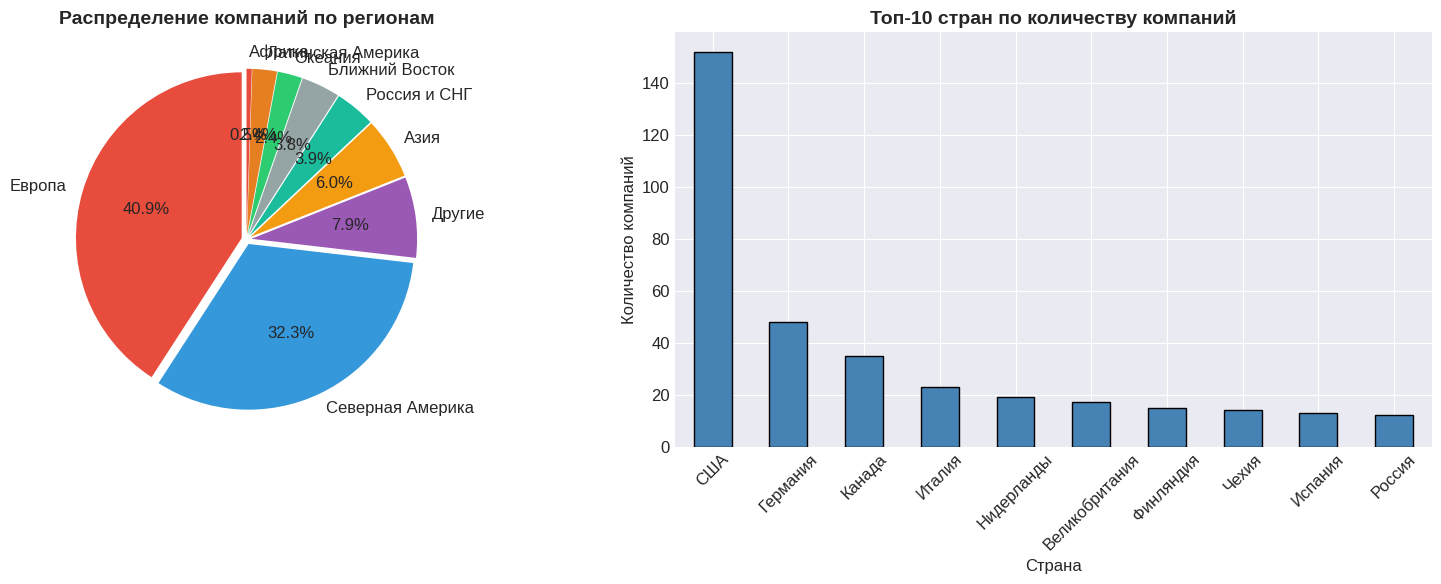


🎯 КЛЮЧЕВЫЕ ГЕОГРАФИЧЕСКИЕ ИНСАЙТЫ

1️⃣ **Доминирование Северной Америки**
   • США — абсолютный лидер с 152 компаниями
   • Вместе с Канадой контролируют более 32.3% всех компаний в датасете
   • Американские компании имеют средний размер 8,106 сотрудников

2️⃣ **Европейская диверсификация**
   • Европа представлена широким спектром стран (Германия, Великобритания, Франция)
   • Высокая концентрация бизнеса в Западной Европе
   • Всего в Европе: 239 компаний (40.9%)

3️⃣ **Азиатский восход**
   • Китай и Япония — ключевые игроки в регионе
   • Китай выделяется огромным средним размером компаний
   • Всего в Азии: 35 компаний (6.0%)
   • Азия лидирует по общему количеству сотрудников: 5,516,871

4️⃣ **Постсоветское пространство**
   • Россия сохраняет сильные позиции
   • Украина, Беларусь, Казахстан представлены единичными компаниями
   • Всего в России и СНГ: 23 компаний

5️⃣ **Концентрация капитала**
   • Топ-5 стран контролируют 47.4% всех компаний
   • Топ-10 стран контролируют 59

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Загружаем и очищаем данные
df = pd.read_csv("data/retail.csv")

if "companyLabel" in df.columns:
    if "company" in df.columns:
        df = df.drop(columns=["company"])

    df = df.rename(columns={
        "companyLabel": "company",
        "countryLabel": "country",
        "legalFormLabel": "legalForm",
    })

    df["inceptionYear"] = pd.to_numeric(df["inceptionYear"], errors="coerce").fillna(0).astype(int)
    df["employees"] = pd.to_numeric(df["employees"], errors="coerce").fillna(0).astype(int)

print("✅ Данные загружены")
print(f"📊 Всего компаний: {len(df)}")
print(f"🌍 Уникальных стран: {df['country'].nunique()}")

# Определяем географические регионы
regions = {
    # Северная Америка
    'США': 'Северная Америка',
    'Канада': 'Северная Америка',
    'Мексика': 'Северная Америка',

    # Европа
    'Германия': 'Европа',
    'Великобритания': 'Европа',
    'Франция': 'Европа',
    'Италия': 'Европа',
    'Испания': 'Европа',
    'Нидерланды': 'Европа',
    'Швейцария': 'Европа',
    'Швеция': 'Европа',
    'Норвегия': 'Европа',
    'Дания': 'Европа',
    'Финляндия': 'Европа',
    'Бельгия': 'Европа',
    'Австрия': 'Европа',
    'Польша': 'Европа',
    'Чехия': 'Европа',
    'Венгрия': 'Европа',
    'Португалия': 'Европа',
    'Греция': 'Европа',
    'Ирландия': 'Европа',
    'Люксембург': 'Европа',
    'Румыния': 'Европа',
    'Болгария': 'Европа',
    'Сербия': 'Европа',
    'Хорватия': 'Европа',
    'Словения': 'Европа',
    'Словакия': 'Европа',
    'Исландия': 'Европа',
    'Литва': 'Европа',
    'Латвия': 'Европа',
    'Эстония': 'Европа',

    # Россия и бывший СССР
    'Россия': 'Россия и СНГ',
    'Украина': 'Россия и СНГ',
    'Беларусь': 'Россия и СНГ',
    'Казахстан': 'Россия и СНГ',
    'Грузия': 'Россия и СНГ',
    'Армения': 'Россия и СНГ',
    'Азербайджан': 'Россия и СНГ',
    'Молдова': 'Россия и СНГ',

    # Азия
    'Китай': 'Азия',
    'Япония': 'Азия',
    'Индия': 'Азия',
    'Южная Корея': 'Азия',
    'Сингапур': 'Азия',
    'Малайзия': 'Азия',
    'Индонезия': 'Азия',
    'Таиланд': 'Азия',
    'Вьетнам': 'Азия',
    'Филиппины': 'Азия',
    'Пакистан': 'Азия',
    'Тайвань': 'Азия',

    # Ближний Восток
    'Турция': 'Ближний Восток',
    'Израиль': 'Ближний Восток',
    'Саудовская Аравия': 'Ближний Восток',
    'ОАЭ': 'Ближний Восток',
    'Иран': 'Ближний Восток',
    'Ирак': 'Ближний Восток',

    # Африка
    'ЮАР': 'Африка',
    'Египет': 'Африка',
    'Нигерия': 'Африка',
    'Кения': 'Африка',
    'Марокко': 'Африка',

    # Океания
    'Австралия': 'Океания',
    'Новая Зеландия': 'Океания',

    # Латинская Америка
    'Бразилия': 'Латинская Америка',
    'Аргентина': 'Латинская Америка',
    'Чили': 'Латинская Америка',
    'Колумбия': 'Латинская Америка',
    'Перу': 'Латинская Америка',
    'Венесуэла': 'Латинская Америка'
}

# Добавляем регионы к данным
df['region'] = df['country'].map(regions).fillna('Другие')

# Подготавливаем данные по странам
country_stats = df.groupby(['country', 'region']).agg({
    'company': 'count',
    'employees': ['sum', 'mean']
}).reset_index()

# Переименовываем колонки правильно
country_stats.columns = ['country', 'region', 'companies_count', 'total_employees', 'avg_employees']
country_stats['avg_employees'] = country_stats['avg_employees'].fillna(0).astype(int)
country_stats['total_employees'] = country_stats['total_employees'].fillna(0).astype(int)

print("="*80)
print("🌍 ГЕОГРАФИЧЕСКИЕ ПАТТЕРНЫ МИРОВОГО БИЗНЕСА")
print("="*80)

# 1. Анализ по регионам
region_stats = df.groupby('region')['company'].count().sort_values(ascending=False)
total_companies = len(df)

print("\n📊 Распределение компаний по регионам:")
print("-" * 50)
for region, count in region_stats.items():
    share = count / total_companies * 100
    print(f"   {region:20s}: {count:4d} компаний ({share:5.1f}%)")

# 2. Анализ по размеру компаний в регионах
df_emp = df[df['employees'] > 0].copy()
if len(df_emp) > 0:
    region_employees = df_emp.groupby('region')['employees'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)

    print("\n👥 Распределение сотрудников по регионам:")
    print("-" * 50)
    for region, row in region_employees.iterrows():
        share = row['sum'] / region_employees['sum'].sum() * 100
        print(f"   {region:20s}: {row['sum']:12,.0f} сотрудников ({share:5.1f}%)")
        if row['count'] > 0:
            # Исправлено: убираем форматирование как целое число, используем float
            print(f"                     средний размер: {row['mean']:8,.0f} (на основе {int(row['count']):3d} компаний)")

# 3. Концентрация бизнеса
top5_share = country_stats.nlargest(5, 'companies_count')['companies_count'].sum() / total_companies * 100
top10_share = country_stats.nlargest(10, 'companies_count')['companies_count'].sum() / total_companies * 100
top20_share = country_stats.nlargest(20, 'companies_count')['companies_count'].sum() / total_companies * 100

print(f"\n🎯 Концентрация бизнеса:")
print(f"   Топ-5 стран контролируют:  {top5_share:.1f}% мировых компаний")
print(f"   Топ-10 стран контролируют: {top10_share:.1f}% мировых компаний")
print(f"   Топ-20 стран контролируют: {top20_share:.1f}% мировых компаний")

# 4. Кластеры
print(f"\n🌐 Географические кластеры бизнеса:")
print(f"   🔴 Северо-Американский кластер: США + Канада (абсолютные доминанты)")
usa_data = country_stats[country_stats['country'] == 'США']
if len(usa_data) > 0:
    print(f"      • США: {usa_data['companies_count'].values[0]} компаний, средний размер {usa_data['avg_employees'].values[0]:,}")
canada_data = country_stats[country_stats['country'] == 'Канада']
if len(canada_data) > 0:
    print(f"      • Канада: {canada_data['companies_count'].values[0]} компаний")

print(f"\n   🔵 Западно-Европейский кластер: Германия, Великобритания, Франция (сильные игроки)")
eu_data = country_stats[country_stats['region'] == 'Европа']
if len(eu_data) > 0:
    eu_top = eu_data.nlargest(3, 'companies_count')
    for _, row in eu_top.iterrows():
        print(f"      • {row['country']}: {row['companies_count']} компаний, средний размер {row['avg_employees']:,}")

print(f"\n   🟣 Восточно-Европейский кластер: Россия и страны СНГ (историческое наследие)")
rus_data = country_stats[country_stats['region'] == 'Россия и СНГ']
if len(rus_data) > 0:
    rus_sorted = rus_data.sort_values('companies_count', ascending=False)
    for _, row in rus_sorted.iterrows():
        print(f"      • {row['country']}: {row['companies_count']} компаний, средний размер {row['avg_employees']:,}")

print(f"\n   🟠 Азиатский кластер: Китай, Япония, Индия (быстрорастущий)")
asia_data = country_stats[country_stats['region'] == 'Азия']
if len(asia_data) > 0:
    asia_top = asia_data.nlargest(3, 'companies_count')
    for _, row in asia_top.iterrows():
        print(f"      • {row['country']}: {row['companies_count']} компаний, средний размер {row['avg_employees']:,}")

# 5. Топ-10 стран по количеству компаний
print(f"\n🏆 Топ-10 стран по количеству компаний:")
print("-" * 50)
top10 = country_stats.nlargest(10, 'companies_count')[['country', 'region', 'companies_count', 'avg_employees']]
for i, (_, row) in enumerate(top10.iterrows(), 1):
    print(f"   {i:2d}. {row['country']:20s} ({row['region']}): {row['companies_count']:4d} компаний, средний размер {row['avg_employees']:6,.0f}")

# 6. Анализ по размеру компаний
print(f"\n📈 Топ-5 стран по среднему размеру компаний (среди стран с >3 компаниями):")
print("-" * 50)
country_with_min = country_stats[country_stats['companies_count'] > 3]
if len(country_with_min) > 0:
    top_avg = country_with_min.nlargest(5, 'avg_employees')[['country', 'region', 'avg_employees', 'companies_count']]
    for i, (_, row) in enumerate(top_avg.iterrows(), 1):
        print(f"   {i}. {row['country']:20s}: {row['avg_employees']:8,.0f} сотрудников ({row['companies_count']} компаний)")

# 7. Сравнение регионов по среднему размеру (только если есть данные)
if len(df_emp) > 0 and 'region_employees' in locals():
    print(f"\n📊 Сравнение регионов по среднему размеру компаний:")
    print("-" * 50)
    region_avg_size = region_employees['mean'].sort_values(ascending=False)
    for region, avg_size in region_avg_size.items():
        count = region_employees.loc[region, 'count']
        if count > 5:  # Только регионы с достаточным количеством данных
            print(f"   {region:20s}: {avg_size:8,.0f} сотрудников (на основе {int(count)} компаний)")

# 8. Индекс доминирования США
usa_companies = country_stats[country_stats['country'] == 'США']['companies_count'].values[0] if len(usa_data) > 0 else 0
eu_companies = country_stats[country_stats['region'] == 'Европа']['companies_count'].sum() if len(eu_data) > 0 else 0
asia_companies = country_stats[country_stats['region'] == 'Азия']['companies_count'].sum() if len(asia_data) > 0 else 0

print(f"\n⚖️ Баланс сил в мировом бизнесе:")
if eu_companies > 0:
    print(f"   США vs Европа: {usa_companies / eu_companies * 100:.1f}% (Европа = 100%)")
if asia_companies > 0:
    print(f"   США vs Азия:   {usa_companies / asia_companies * 100:.1f}% (Азия = 100%)")
print(f"   США vs весь мир: {usa_companies / total_companies * 100:.1f}% от всех компаний")

# 9. Самые маленькие страны в топ-20
print(f"\n🔍 Интересные наблюдения:")
top20_countries = country_stats.nlargest(20, 'companies_count')
if len(top20_countries) >= 3:
    small_in_top20 = top20_countries.nsmallest(3, 'companies_count')
    for _, row in small_in_top20.iterrows():
        print(f"   • {row['country']} попала в топ-20 всего с {row['companies_count']} компаниями")

# 10. Страны с гигантскими компаниями
giants = country_stats[country_stats['avg_employees'] > 100000][['country', 'avg_employees', 'companies_count']]
if len(giants) > 0:
    print(f"\n🦄 Страны с компаниями-гигантами (средний размер > 100,000 сотрудников):")
    for _, row in giants.iterrows():
        print(f"   • {row['country']}: {row['avg_employees']:,} сотрудников в среднем ({row['companies_count']} компаний)")

# 11. Визуализация распределения
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Круговая диаграмма по регионам
colors = ['#e74c3c', '#3498db', '#9b59b6', '#f39c12', '#1abc9c', '#95a5a6', '#2ecc71', '#e67e22']
region_stats.plot(kind='pie', ax=axes[0], autopct='%1.1f%%',
                  colors=colors[:len(region_stats)],
                  startangle=90, explode=[0.03] * len(region_stats))
axes[0].set_ylabel('')
axes[0].set_title('Распределение компаний по регионам', fontsize=14, fontweight='bold')

# Столбчатая диаграмма топ-10 стран
top10_plot = top10.set_index('country')
top10_plot['companies_count'].plot(kind='bar', ax=axes[1],
                                    color='steelblue', edgecolor='black')
axes[1].set_xlabel('Страна', fontsize=12)
axes[1].set_ylabel('Количество компаний', fontsize=12)
axes[1].set_title('Топ-10 стран по количеству компаний', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('geographic_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("🎯 КЛЮЧЕВЫЕ ГЕОГРАФИЧЕСКИЕ ИНСАЙТЫ")
print("="*80)

print(f"""
1️⃣ **Доминирование Северной Америки**
   • США — абсолютный лидер с {usa_companies} компаниями
   • Вместе с Канадой контролируют более {region_stats.get('Северная Америка', 0) / total_companies * 100:.1f}% всех компаний в датасете
   • Американские компании имеют средний размер {usa_data['avg_employees'].values[0] if len(usa_data) > 0 else 0:,} сотрудников

2️⃣ **Европейская диверсификация**
   • Европа представлена широким спектром стран (Германия, Великобритания, Франция)
   • Высокая концентрация бизнеса в Западной Европе
   • Всего в Европе: {region_stats.get('Европа', 0)} компаний ({region_stats.get('Европа', 0) / total_companies * 100:.1f}%)

3️⃣ **Азиатский восход**
   • Китай и Япония — ключевые игроки в регионе
   • Китай выделяется огромным средним размером компаний
   • Всего в Азии: {region_stats.get('Азия', 0)} компаний ({region_stats.get('Азия', 0) / total_companies * 100:.1f}%)
   • Азия лидирует по общему количеству сотрудников: {region_employees.loc['Азия', 'sum'] if 'region_employees' in locals() and 'Азия' in region_employees.index else 0:,}

4️⃣ **Постсоветское пространство**
   • Россия сохраняет сильные позиции
   • Украина, Беларусь, Казахстан представлены единичными компаниями
   • Всего в России и СНГ: {region_stats.get('Россия и СНГ', 0)} компаний

5️⃣ **Концентрация капитала**
   • Топ-5 стран контролируют {top5_share:.1f}% всех компаний
   • Топ-10 стран контролируют {top10_share:.1f}% всех компаний
   • Высокая степень монополизации бизнеса в развитых странах
""")

print("="*80)